<a href="https://colab.research.google.com/github/20rashmi128/Predicting-Ted-Talks-Views/blob/main/1_Notebook_Ted_talk_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given Problem Statement:**

TED is devoted to spreading powerful ideas on just about any topic. This dataset contains over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. 

As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.



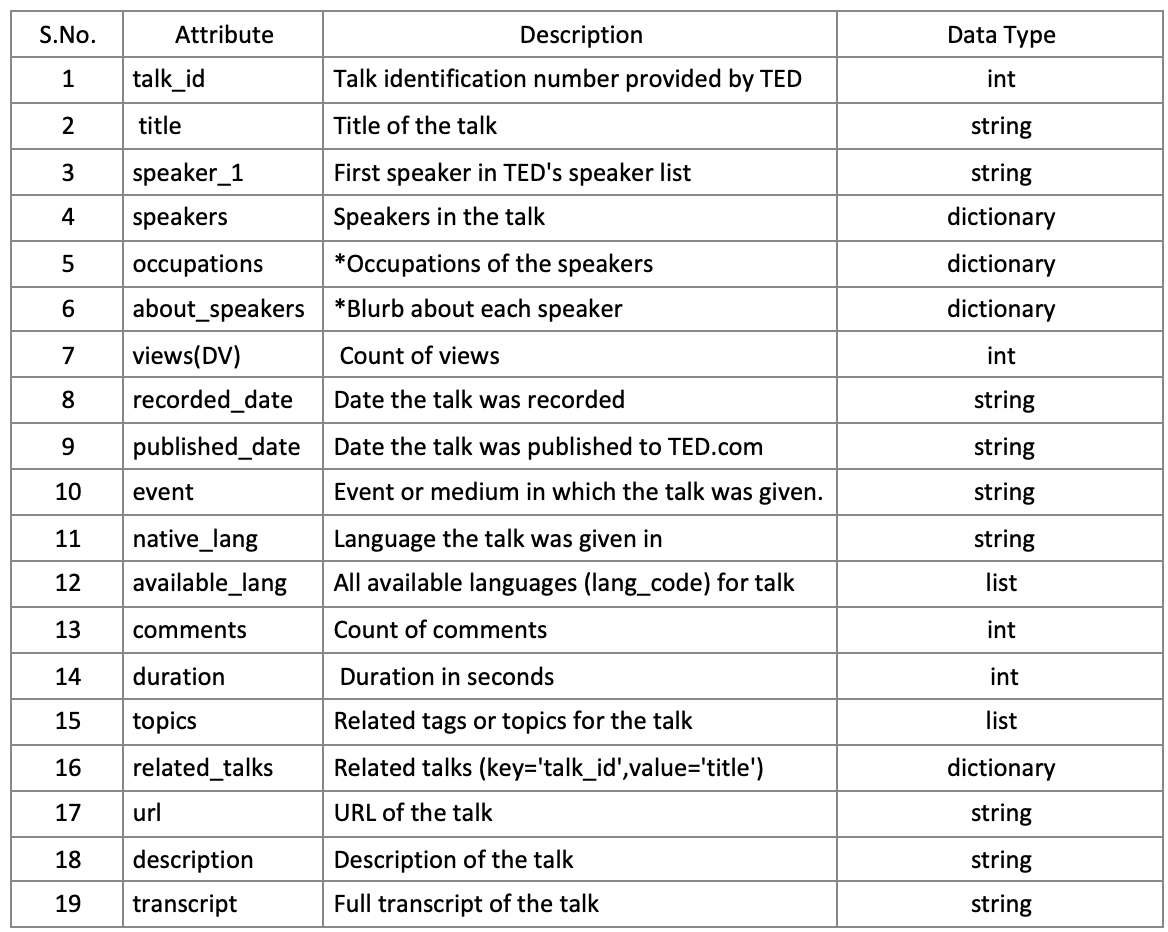

*The dictionary key maps to the speaker in ‘speakers’.

# **A. Importing dataset and relevant python libraries**

In [ ]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import datetime

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew, kurtosis
import math

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Ted Talk Views Prediction - Kumari Rashmi/problem data/data_ted_talks.csv')
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


# **B. Exploratory data analysis And Visualization**

## B(i). Basic Information about dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
data.describe()
# There are 4 numerical features.

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
data.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [ ]:
data.describe(include='object').columns
#  There are 15 non-numerical features

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')

Observations:
1. There total 4005 observations with 19 total features.
2. Numerical Features: talk_id, views, comments and duration
3. Ordinal categorical: recorded_date, published_date and event
4. Rest are textual features.
5. On primary evaluation, found talk_id and url columns to be irrelevant to our analysis.
6. Duration is given in seconds; will be converted into minutes for clarity purpose.
7. Few talks have 0 views and 0 comments; Shortest Talk is of 60 seconds (which is unusual, will be checked later).
8. Majority of talks are in English (3957).

## B(ii). Data Pre-processing and Cleaning

**On primary examination, Columns talk_id, url and about_speakers seem to be irrelevant to our analysis. Therefore, these columns have been dropped.**

In [ ]:
data.drop(['talk_id','url','about_speakers'], axis=1,inplace=True)

In [ ]:
data.head(1)

,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


### **1. Formatting data type Inconsistencies**
        1. all_speakers, occupations and related_talks are dictionary, but are stored as string data types. So, will be converted to dictionary data types.
        2. recorded_date and published_Date are stored as string data type. so, will be converted to datetime format.
        3. available_lang is stored as string data type. so will be converted to list data type.

In [ ]:
#  checking data types of occupations & related_talks columns
type(data.loc[0,'all_speakers']),type(data.loc[0,'occupations']),type(data.loc[0,'related_talks'])

(str, str, str)

In [ ]:
# applying eval() function on all string values of all_speakers, occupations & related_talks column
data.loc[~data['all_speakers'].isnull(),'all_speakers'] = data.loc[~data['all_speakers'].isnull(),'all_speakers'].apply(lambda row: eval(row))
data.loc[~data['occupations'].isnull(),'occupations'] = data.loc[~data['occupations'].isnull(),'occupations'].apply(lambda row: eval(row))
data.loc[~data['related_talks'].isnull(),'related_talks'] = data.loc[~data['related_talks'].isnull(),'related_talks'].apply(lambda row: eval(row))

In [ ]:
# verifying the data types of above columns
type(data.loc[0,'all_speakers']),type(data.loc[0,'occupations']),type(data.loc[0,'related_talks'])

(dict, dict, dict)

In [ ]:
#  checking data types of recorded_date and published_date columns
type(data.loc[0,'recorded_date']),type(data.loc[0,'published_date'])

(str, str)

In [ ]:
# converting data types of above columns to datetime format
data['published_date'] = (pd.to_datetime(data['published_date'])).dt.date
data['recorded_date'] = (pd.to_datetime(data['recorded_date'])).dt.date

In [ ]:
# verifying the data types of above columns
type(data.loc[0,'recorded_date']),type(data.loc[0,'published_date'])

(datetime.date, datetime.date)

In [ ]:
data.loc[4000,'available_lang']

"['en']"

In [ ]:
# applying eval() function on all string values of occupations & related_talks column
data.loc[~data['available_lang'].isnull(),'available_lang'] = data.loc[~data['available_lang'].isnull(),'available_lang'].apply(lambda row: eval(row))

In [ ]:
data.loc[4000,'available_lang']

['en']

### **2. Handling Missing Values**

In [ ]:
# checking column wise percentages of missing values.
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

comments          16.354557
occupations       13.033708
all_speakers       0.099875
recorded_date      0.024969
title              0.000000
speaker_1          0.000000
views              0.000000
published_date     0.000000
event              0.000000
native_lang        0.000000
available_lang     0.000000
duration           0.000000
topics             0.000000
related_talks      0.000000
description        0.000000
transcript         0.000000
dtype: float64

**a) Missing values in comments column**

In [ ]:
# Checking comments column against Ted talks with 0 views.
(data[data['views']==0])['comments'].unique()
# found that Ted talks with 0 view has missing values in comment column.
# Totally makes sense; therefore these missing values can be replaced by 0 in comments column.

array([nan])

In [ ]:
data[data['views']==0]
# There are 6 talks with 0 views; further these talks have Missing values against comments column.
# Its logical to assume that if a talk has 0 view, it will also not have any comment.

,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
2813,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},0,2018-04-26,2018-06-06,TED en Español en NYC,es,"[en, es]",NaN,772,"['environment', 'economics', 'biosphere', 'nat...",{17733: 'Let's turn the high seas into the wor...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"[en, es, pt]",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"[en, es, nl]",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...","Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",0,2019-05-18,2019-06-11,TEDxLondon,en,"[en, pt-br, ru, zh-tw]",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"[en, es, it]",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: 'A to...","Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,0,2020-04-30,2020-04-30,TED-Ed,en,[en],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [ ]:
# Accordingly, lets replace these missing values with 0 in comments column.
data['comments']=np.where(data['views']==0,0,data['comments'])

In [ ]:
data[data['views']==0]

,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
2813,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},0,2018-04-26,2018-06-06,TED en Español en NYC,es,"[en, es]",0.0,772,"['environment', 'economics', 'biosphere', 'nat...",{17733: 'Let's turn the high seas into the wor...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"[en, es, pt]",0.0,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"[en, es, nl]",0.0,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...","Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",0,2019-05-18,2019-06-11,TEDxLondon,en,"[en, pt-br, ru, zh-tw]",0.0,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"[en, es, it]",0.0,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: 'A to...","Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,0,2020-04-30,2020-04-30,TED-Ed,en,[en],0.0,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [ ]:
data['comments'].isna().sum()
# there are still 649 missing values in comments column.

649

In [ ]:
data['comments'].describe()

count    3356.000000
mean      161.707390
std       268.685617
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

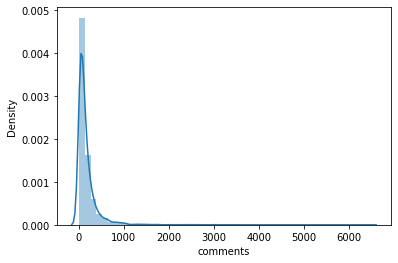

In [ ]:
sns.distplot(data['comments'])
# comments are highly skewed to the right (positive)
#  will impute missing values in comments using Median instead of mean

In [ ]:
# For missing values in comments column, let's substitute these with "Other"
data.loc[data['comments'].isna(),'comments']=data[~data['comments'].isnull()]['comments'].median()

In [ ]:
# Lets substitute these missing values using KNNImputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# imputed_data = imputer.fit_transform(data[['comments']])  # impute all the missing data
# df_temp = pd.DataFrame(imputed_data).rename(columns={0:'comments'})
# df_temp
# data['comments'] = df_temp['comments']  # update only the desired column

In [ ]:
data['comments'].isna().sum()
#  No missing values in comments column

0

**b) Missing values in occupations column**

In [ ]:
# created a new column for occupation of speaker1.
data.loc[~data['occupations'].isna(),'occupation1']=data.loc[~data['occupations'].isna(),'occupations'].apply(lambda x:x[0][0])

In [ ]:
# For missing values in occupations column, let's substitute these with "Other"
data.loc[data['occupations'].isna(),'occupation1']='other'

In [ ]:
data.head(2)

,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary


In [ ]:
data['occupation1'].isna().sum()

0

In [ ]:
data['occupation1'].nunique()
#  there total 1552 unique occupations for 1st speaker.

1552

In [ ]:
#  lets drop occupations column, as it seems to be irrelevant to our analysis.
data.drop('occupations',axis=1,inplace= True)

**c) Missing values in recorded_date column**

In [ ]:
data['recorded_date'].isnull().sum()
# Only 1 talk has missing recorded_Date

1

In [ ]:
data[data['recorded_date'].isnull()]
# There seems to be no way to impute missing recorded_date

,title,speaker_1,all_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1
3831,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},1276272,NaT,2020-01-23,TEDxChristchurch,en,"[en, es, fr, it, ko, pt, tr, vi, zh-cn, zh-tw]",20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...,economist


d) Missing values in all_speakers column

In [ ]:
data[data['all_speakers'].isna()]

,title,speaker_1,all_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1
2927,How prefab homes can transform affordable housing,Antón García-Abril,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"[en, es]",89.0,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...,other
3266,Why we need to stop obsessing over World War II,Keith Lowe,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"[en, pt, sr]",89.0,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...,other
3290,Why talent carries you further than fame,Maisie Williams,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"[ar, de, el, en, es, fr, hu, pt-br, tr, zh-cn,...",89.0,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...,other
3665,Are we living in a simulation?,Zohreh Davoudi,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"[ar, el, en, es, fa, fr, he, id, it, ja, ko, m...",89.0,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...","All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla...",other


In [ ]:
#  For missing all_speakers value, lets assume that there is only one speaker.
#  No way to substitute these missing values

In [ ]:
data.isnull().sum().sort_values(ascending=False)

all_speakers      4
recorded_date     1
title             0
speaker_1         0
views             0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
description       0
transcript        0
occupation1       0
dtype: int64

### **3. Handling Outliers**

In [ ]:
# checking the names of relevant numerical columns
data.describe().columns
# 3 relevant numerical features
#  lets check for any outliers

Index(['views', 'comments', 'duration'], dtype='object')

**a) Comments column**

In [ ]:
# checking statistical parameters of comments column.
data['comments'].describe(percentiles=[0,0.5,0.75,0.85,0.95,0.99,1])

count    4005.000000
mean      149.925343
std       247.403559
min         0.000000
0%          0.000000
50%        89.000000
75%       162.000000
85%       242.000000
95%       478.400000
99%      1003.920000
100%     6449.000000
max      6449.000000
Name: comments, dtype: float64

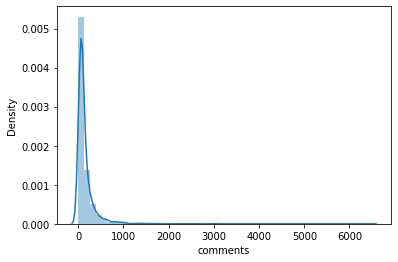

In [ ]:
# density plot for comments column.
sns.distplot(data['comments'])
# highly skewed to the right (positively skewed)

In [ ]:
print("skewness:",round(skew(data['comments']),2))
print("kurtosis:",round(kurtosis(data['comments']),2))
# Highly skewed : positive
# high kurtosis : heavy tail

skewness: 9.65
kurtosis: 168.92


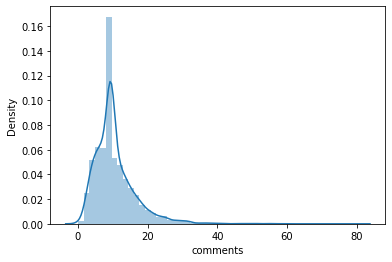

In [ ]:
# density plot for log values of comments column
sns.distplot(np.sqrt(data['comments']))
# density plot is still highly skewed to the right (positively skewed)

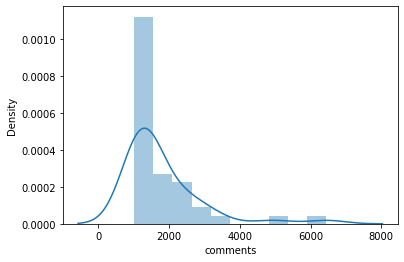

In [ ]:
# density plot for comments values more than 1003 comments.
sns.distplot(data[data['comments']>1003]['comments'])

In [ ]:
print('Average of total views for talks with comments more than 1004: {:,}'.format(round((data[data['comments']>1004]['views']).mean())))

Average of total views for talks with comments more than 1004: 13,251,981


In [ ]:
print('Average of total views for talks with comments less than 1004: {:,}'.format(round((data[data['comments']<1004]['views']).mean())))

Average of total views for talks with comments less than 1004: 2,035,569


In [ ]:
print('Average of total views for complete dataset: {:,}'.format(round((data['views']).mean())))

Average of total views for complete dataset: 2,148,006


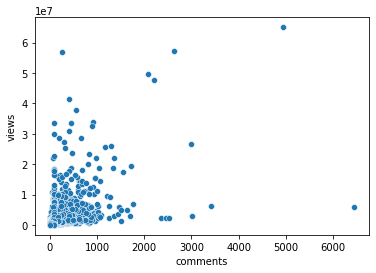

In [ ]:
# scatter plot for comments vs views columns.
sns.scatterplot(x='comments',y='views',data=data)

In [ ]:
data[data['comments']==0]
# 6 Ted talks have 0 views and 0 comments.
# 2 Ted talks have 0 comments, but non-zero views.

,title,speaker_1,all_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1
2813,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},0,2018-04-26,2018-06-06,TED en Español en NYC,es,"[en, es]",0.0,772,"['environment', 'economics', 'biosphere', 'nat...",{17733: 'Let's turn the high seas into the wor...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...,marine ecologist
3056,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"[en, es, pt]",0.0,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw...",photographer
3068,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"[en, es, nl]",0.0,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...","Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...,técnica agropecuaria y agroalimentaria
3520,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},0,2019-05-18,2019-06-11,TEDxLondon,en,"[en, pt-br, ru, zh-tw]",0.0,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...,biologist
3790,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"[en, es, it]",0.0,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: 'A to...","Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...,productor audiovisual
3893,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"[ar, en, es, fr, tr]",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,...",food enthusiast
3898,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"[ar, en, es, fr, pt-br, tr]",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...,designer
4004,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},0,2020-04-30,2020-04-30,TED-Ed,en,[en],0.0,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,other


**Observations:**
1. 99% of Ted talks have comments less than or equal to 1004.
2. Only 1% of Ted Talks have comments more tha 1003 and less than 6449.
3. Density plot of comments is highly skewed to the right , positively skewed. Mean (~150 comments) is greater than Median (89 comments).
4. On analysing the Ted Talks with views more than 1003 comments, it turns out the average number of views for these talks is significantly higher than the average for whole dataset. It implies that as the number of comments increases, the number of views also increases (Positive correlation).
5. Since it is very much possible to have comments higher as 6449, these comments are natural outliers and depicts real-world trend. Hence, were not treated.
6. 6 Ted talks have 0 views and 0 comments; while 2 Ted talks have 0 comments, but non-zero views. Since these cases are also possible in real world scenarios, these are natural and hence ignored.

**b) Duration (in seconds)**

In [ ]:
# checking statistical parameters of duration column.
data['duration'].describe(percentiles=[0,0.5,0.75,0.85,0.95,0.99,1])
# duration is given in seconds, lets convert it to minutes to have better range of values.

count    4005.000000
mean      724.011236
std       361.775462
min        60.000000
0%         60.000000
50%       738.000000
75%       974.000000
85%      1072.000000
95%      1230.800000
99%      1601.120000
100%     3922.000000
max      3922.000000
Name: duration, dtype: float64

In [ ]:
data['duration']=data['duration'].apply(lambda x:x/60)

In [ ]:
# checking statistical parameters of duration column.
data['duration'].describe(percentiles=[ 0,0.50, 0.75,0.90 ,0.95,0.99,1 ])

count    4005.000000
mean       12.066854
std         6.029591
min         1.000000
0%          1.000000
50%        12.300000
75%        16.233333
90%        18.883333
95%        20.513333
99%        26.685333
100%       65.366667
max        65.366667
Name: duration, dtype: float64

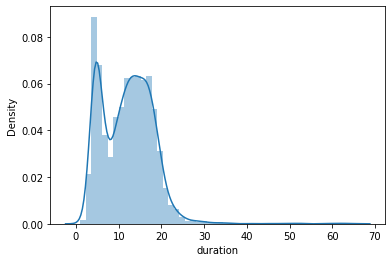

In [ ]:
# density plot for duration column in minutes.
sns.distplot(data['duration'])

In [ ]:
print("skewness:",round(skew(data['duration']),2))
print("kurtosis:",round(kurtosis(data['duration']),2))
# Kurtosis: measures peakedness of a distribution. high implies thin & peaky curve. low value indicates flatter curve.
# acceptable range for skewness (<2, ideal is 0) & kurtosis(<7, ideal is 3).
# normal distribution

skewness: 1.19
kurtosis: 6.84


In [ ]:
data[data['duration']<= 2]
# There are total 5 Ted Talks with duration less than or equal to 2 mintutes.
# On exploring these 5 Ted talks, found that 4 are animated versions of some poems and 1 is animated visual short video.
# Further, Ted Talk on their platform had stated that in one of their series, they do animate the poems based on audience's demands.

,title,speaker_1,all_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1
2753,"""Illusions for a better society""",Aaron Duffy,"{0: 'Aaron Duffy', 1: 'Lake Buckley', 2: 'Jack...",10356,2018-04-13,2018-04-14,TED2018,en,[en],89.0,1.783333,"['visualizations', 'film']","{14609: '""Chromatic""', 14611: '""It's not amazi...",Could visual illusions be a cure for polarizat...,Narrator: We have you here today specifically ...,other
3502,"""The Second Coming""",William Butler Yeats,{0: 'William Butler Yeats'},198694,2019-05-31,2019-05-31,TED-Ed,en,"[ar, en, es, fa, fr, he, hu, it, ja, ko, ku, m...",89.0,1.816667,"['animation', 'poetry', 'TED-Ed', 'writing', '...","{37985: '""First Kiss""', 42248: '""The Nutrition...","This animation is part of the TED-Ed series, ""...","""The Second Coming"" by William Butler Yeats Tu...",other
3516,"""Three Months After""",Cristin O'Keefe Aptowicz,{0: 'Cristin O'Keefe Aptowicz'},133886,2019-06-07,2019-06-07,TED-Ed,en,"[ar, de, el, en, es, fa, fr, he, hu, id, it, j...",89.0,1.300000,"['animation', 'writing', 'TED-Ed', 'poetry', '...","{42248: '""The Nutritionist""', 42546: '""The Sec...","This animation is part of the TED-Ed series, ""...","I'm Cristin O'Keefe Aptowicz and this is ""Thre...",other
3554,"""New Colossus""",Emma Lazarus,{0: 'Emma Lazarus'},142405,2019-07-02,2019-07-08,TED-Ed,en,"[ar, de, en, es, fa, fr, he, hu, it, ja, ko, k...",89.0,1.300000,"['animation', 'TED-Ed', 'poetry', 'writing', '...","{42464: '""To Make Use of Water""', 42819: '""Thr...","This animation is part of the TED-Ed series, ""...","""The New Colossus"" by Emma Lazarus Not like th...",other
3623,"""Ode to the Only Black Kid in the Class""",Clint Smith,{0: 'Clint Smith'},163277,2019-09-09,2019-09-09,TED-Ed,en,"[ar, el, en, es, fa, fr, he, id, it, ja, ko, k...",89.0,1.000000,"['TED-Ed', 'animation', 'poetry', 'race', 'ine...","{41656: 'The Opposites Game', 42248: '""The Nut...","This animation is part of the TED-Ed series, ""...","I'm Clint Smith and this is ""Ode to the Only B...",poet


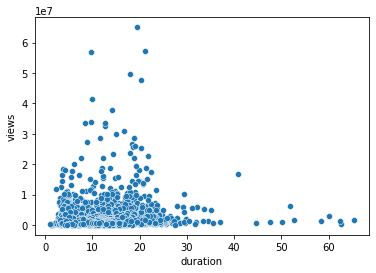

In [ ]:
# Scatter plot for durtion vs views columns.
sns.scatterplot(x='duration',y='views',data=data)

**Observations:**
1. duration was given in seconds, later converted it to minutes to have better range of values.
2. 95% of Ted talks have duration of less than or equal to ~21 minutes.
3. 99% of Ted talks have duration of less than or equal to ~27 minutes.
4. Only 1% Ted talks have duration more than 27 minutes and goes as long as till ~66 minutes.
5. Since Talks of longer duration is very much possible, these are natural outliers. Hence not treated.
6. There are total 5 Ted Talks with duration less than 2 mintutes. On exploring these 5 Ted talks, found that 4 are animated versions of some poems and 1 is animated visual short video. Further, Ted Talk on their platform had stated that in one of their series, they do animate the poems based on audience's demands. So these are natural irregularitiees and hence were not treated.

**c) Views Column (Target Variable)**

In [ ]:
# checking statistical parameters of views column.
data['views'].describe(percentiles=[0,0.5,0.75,0.85,0.95,0.99,1])

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
0%       0.000000e+00
50%      1.375508e+06
75%      2.133110e+06
85%      3.019490e+06
95%      6.182301e+06
99%      1.629983e+07
100%     6.505195e+07
max      6.505195e+07
Name: views, dtype: float64

In [ ]:
# checking number of ted talks with 0 views.
print('Number of talks with 0 view:',len(data[data['views']==0]))

Number of talks with 0 view: 6


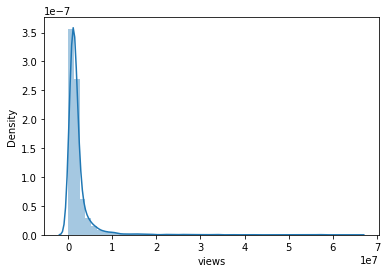

In [ ]:
# density plot for views column.
sns.distplot(data['views'])
# positively skewed with a long tail

In [ ]:
# checking skewness and kurtosis for views density plot.
print("skewness:",round(skew(data['views']),2))
print("kurtosis:",round(kurtosis(data['views']),2))
# High skewness: positive skewed
# high kurtosis: heavy tail(outliers present)

skewness: 8.18
kurtosis: 98.61


**Observations:**
1. Mean number of views : 21,48,006 views and Median number of views : 13,75,508 views. 
2. only 1% of talks have received views more than ~17lakhs and goes till ~65lakhs. High number of views suggest more popularity of a given talk. So these outliers are natural and hence ignored.
3. 6 Talks have received 0 views. Since this is possible in real world scenarios, these are natural and hence ignored.
4. Density plot is highly skewed with long tail and peaky with outliers present.

## B(iii). Feature Engineering

a) Basis published date, we can extract day, month and year of date of publishing and basis that we could identify any trend between publishing date and number of views

In [ ]:
# Extracting day, month and year of publishing as new features
data['pub_day'] = data['published_date'].apply(lambda x: x.strftime("%A"))
data['pub_month'] = data['published_date'].apply(lambda x: x.strftime("%B"))
data['pub_year'] = data['published_date'].apply(lambda x: x.strftime("%Y"))

b) Total lifetime of a ted talk till latest publishing date

In [ ]:
#  Lets also extract the total time period for which a talk has been live, 
# i.e., difference between latest published date and respective published date.
latest = data['published_date'].max()
# 30th april 2020 is the last publishing date.
data['lifetime'] = latest - data['published_date']

In [ ]:
#  recorded_date is of no use to us, lets drop this column
data.drop('recorded_date',axis=1,inplace=True)

In [ ]:
data['lifetime']=data['lifetime'].apply(lambda x:x.days)

In [ ]:
data.loc[0,'lifetime']

5056

c) getting count of languages in which a talk is available for watching and will later check for relationship between #languages and #views

In [ ]:
#  create new feature for total count of available languages for a given talk
data['num_lang']=data['available_lang'].apply(lambda x:len(x))

d) Basis related_talks, will extract count of related talks.

Hypothesis: High number of related talks increases high visibility (recommender system working) of that talk and as a result, more chances of it getting viewed.

Will confirm later.

In [ ]:
# checking data type of related_talks column
data.loc[4000,'related_talks']

{2362: 'How data from a crisis text line is saving lives',
 2681: 'My son was a Columbine shooter. This is my story',
 9463: 'The gift and power of emotional courage',
 11871: 'The best way to help is often just to listen',
 29775: "In the opioid crisis, here's what it takes to save a life",
 56860: 'How teachers can help students navigate trauma'}

In [ ]:
data['#related_talks'] = data['related_talks'].apply(lambda x:len(x))

In [ ]:
data.tail()

,title,speaker_1,all_speakers,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},502934,2020-04-27,TED2020: The Prequel,en,[en],6.0,11.500000,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",health activist,Monday,April,2020,3,1,6
4001,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},307187,2020-04-27,TED-Ed,en,"[en, es, my, pt-br]",89.0,5.766667,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",other,Monday,April,2020,3,4,6
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},464414,2020-04-28,TEDxMileHigh,en,[en],9.0,12.900000,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...","Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,law researcher,Tuesday,April,2020,2,1,6
4003,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},56582,2020-04-30,TED-Ed,en,[en],89.0,4.283333,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",other,Thursday,April,2020,0,1,6
4004,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},0,2020-04-30,TED-Ed,en,[en],0.0,4.683333,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,other,Thursday,April,2020,0,1,6


e) Creating a feature for count of speakers and will later investigate any relation between #speakers and #views.

In [ ]:
#  Adding a column containing count of speakers in a given Ted Talk
data.loc[~data['all_speakers'].isnull(),'num_speakers']=data.loc[~data['all_speakers'].isnull(),'all_speakers'].apply(lambda x: len(x))
data.loc[data['all_speakers'].isnull(),'num_speakers'] = 1
data.head(2)

,title,speaker_1,all_speakers,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},3523392,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,5056,43,6,1.0
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},14501685,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,19.833333,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,5056,49,6,1.0


In [ ]:
# Now i dont see any further use of all_speakers column, therefore dropping it.
data.drop('all_speakers',axis=1,inplace=True)

## B(iv). Univariate Analysis

In [ ]:
data.columns

Index(['title', 'speaker_1', 'views', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript', 'occupation1', 'pub_day', 'pub_month',
       'pub_year', 'lifetime', 'num_lang', '#related_talks', 'num_speakers'],
      dtype='object')

In [ ]:
text_data = data[['title','native_lang','available_lang','topics','description','transcript']]

In [ ]:
data.head(1)

,title,speaker_1,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,5056,43,6,1.0


### 1. Speakers
    1. speaker_1
    2. num_speakers

In [ ]:
data['num_speakers'].value_counts(normalize=True).reset_index().rename(columns={'index':'num_speakers','num_speakers':'#Talks'})
# Only 1 ted talk with 5 speakers and 3 talks with 4 speakers; will explore these talks later
# Majority of Talks (~97%) are given by 1 speaker only.

,num_speakers,#Talks
0,1.0,0.971536
1,2.0,0.024220
2,3.0,0.003246
3,4.0,0.000749
4,5.0,0.000250


In [ ]:
data[data['num_speakers']==5]
# Ted talk with 5 speakers is basically a dance performance.

,title,speaker_1,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers
2453,A dance to honor Mother Earth,Jon Boogz,309366,2017-08-11,TED2017,en,"[ar, en, es, fa, fr, hy, it, ja, ko, lv, mn, m...",10.0,9.583333,"['dance', 'art', 'creativity', 'performance', ...",{2589: 'A visual history of social dance in 25...,Movement artists Jon Boogz and Lil Buck debut ...,Mother Earth: Our end was imminent yet finalit...,movement artist,Friday,August,2017,993,20,6,5.0


In [ ]:
speakers_df=data.groupby('num_speakers').views.mean().reset_index()
# Taking average of views basis #speakers, found that Talks with 1 speaker has received more views.
speakers_df

,num_speakers,views
0,1.0,2.161337e+06
1,2.0,1.667705e+06
2,3.0,2.167185e+06
3,4.0,9.164387e+05
4,5.0,3.093660e+05


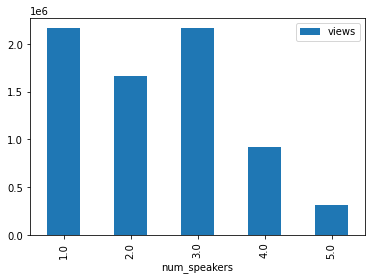

In [ ]:
speakers_df.plot(x='num_speakers',y='views',kind='bar')
# There seems to have no strong relationship between views and #speakers.

In [ ]:
data.groupby('speaker_1')['views'].mean().sort_values(ascending=False)
# Ted talks given by Amy Cuddy has maximu average views received.

speaker_1
Amy Cuddy                 57074270.0
James Veitch              39421820.5
Tim Urban                 37976820.0
Cameron Russell           33874546.0
Sam Berns                 33691484.0
                             ...    
Alisa Kazarina               10680.0
Aaron Duffy                  10356.0
Cella Wright                     0.0
Renata di Tullio                 0.0
Alejandro Chaskielberg           0.0
Name: views, Length: 3274, dtype: float64

In [ ]:
data[data['speaker_1']=='Amy Cuddy']
# She has given 1 talk on "body language" in year 2012, available in 51 languages.

,title,speaker_1,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers
1296,Your body language may shape who you are,Amy Cuddy,57074270,2012-10-01,TEDGlobal 2012,en,"[ar, az, bg, ca, cs, da, de, el, en, es, et, f...",2633.0,21.033333,"['body language', 'brain', 'business', 'psycho...","{1042: 'The power of vulnerability', 26915: 'H...",(NOTE: Some of the findings presented in this ...,So I want to start by offering you a free no-t...,social psychologist,Monday,October,2012,2768,51,6,1.0


In [ ]:
data[data['speaker_1'].duplicated()]['speaker_1'].value_counts()
# 424 speakers have given multiple ted talks.
# Alex Gendler has given maximum number of ted talks (34).

Alex Gendler        33
Iseult Gillespie    18
Emma Bryce          11
Daniel Finkel       10
Hans Rosling         9
                    ..
Kary Mullis          1
Cesar Harada         1
Will Potter          1
Vijay Kumar          1
Ming Luke            1
Name: speaker_1, Length: 424, dtype: int64

### Event column

In [ ]:
data['event'].nunique(), (data[data['event'].str.contains('TED')])['event'].nunique()
# There are total 459 unique events, out of which only 436 events explicitly TED talks. 
# Lets investigate other non-TED talks for better clarity

(459, 436)

In [ ]:
len(data[~data['event'].str.contains('TED')])
# Total 143 Talks were given at events other than Ted platform, may be were later added under Ted Talks.

143

In [ ]:
(data[~data['event'].str.contains('TED')])['event'].unique()
# It seems that rest of non-TED event talks were hosted in different forums/conferences and may have been later added to TeD platforms.

array(['Skoll World Forum 2007', 'DLD 2007', 'EG 2007', 'LIFT 2007',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'EG 2008', 'Elizabeth G. Anderson School', 'Mission Blue Voyage',
       'Business Innovation Factory', 'INK Conference',
       'Full Spectrum Auditions', 'Mission Blue II', 'Global Witness',
       'Small Thing Big Idea', 'Torchbearers', 'DIY Neuroscience',
       'We the Future', 'The Way We Work', 'Arbejdsglaede Live',
       'Countdown', 'Currently'], dtype=object)

In [ ]:
data[~data['event'].str.contains('TED')].sort_values(by='published_date')
# All non-Ted-event-talks were published in between years 2007 to 2020.

,title,speaker_1,views,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers
158,The case for optimism,Larry Brilliant,511467,2007-11-21,Skoll World Forum 2007,en,"[ar, bg, cs, de, en, es, fa, fr, he, hu, it, j...",49.0,21.016667,"['climate change', 'culture', 'global issues',...","{58: 'My wish: Help me stop pandemics', 163: '...",We've known about global warming for 50 years ...,I'm going to try to give you a view of the wor...,epidemiologist,Wednesday,November,2007,4544,22,6,1.0
202,My green agenda for architecture,Norman Foster,870918,2008-03-24,DLD 2007,en,"[ar, bg, de, el, en, es, fr, he, it, ja, ko, n...",67.0,31.950000,"['architecture', 'cities', 'green', 'Best of t...","{104: 'Cradle to cradle design', 49: 'Behind t...",Architect Norman Foster discusses his own work...,"As an architect you design for the present, wi...",architect,Monday,March,2008,4420,23,6,1.0
224,What's wrong with what we eat,Mark Bittman,4744368,2008-05-15,EG 2007,en,"[ar, bg, cs, de, el, en, es, et, fi, fr, he, h...",582.0,20.133333,"['environment', 'food', 'green', 'obesity', 's...","{348: 'What's wrong with school lunches', 214:...","In this fiery and funny talk, New York Times f...",I write about food. I write about cooking. I t...,food writer,Thursday,May,2008,4368,30,6,1.0
241,"One Laptop per Child, two years on",Nicholas Negroponte,473076,2008-06-26,EG 2007,en,"[ar, bg, de, en, es, fr, he, it, ja, ko, lt, n...",43.0,16.666667,"['activism', 'computers', 'design', 'technolog...","{230: '5 predictions, from 1984', 266: 'Design...",Nicholas Negroponte talks about how One Laptop...,Most people don't know that when I went to hig...,tech visionary,Thursday,June,2008,4326,18,6,1.0
244,The story of a girl,Rick Smolan,1370971,2008-07-02,EG 2007,en,"[ar, bg, de, el, en, es, fr, he, hr, it, ja, k...",205.0,25.116667,"['art', 'children', 'family', 'global issues',...","{34: 'Photos of endangered cultures', 279: 'Tu...",Photographer Rick Smolan tells the unforgettab...,"Some of you have heard the story before, but, ...",photographer,Wednesday,July,2008,4320,25,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,How surfboards connect us to nature,Yves Béhar,181783,2020-02-18,Small Thing Big Idea,en,"[ar, en, es, fr, pt-br, tr]",0.0,3.383333,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...,designer,Tuesday,February,2020,72,6,6,1.0
3906,What if a single human right could change the ...,Kristen Wenz,1000807,2020-02-24,We the Future,en,"[ar, en, fa, fr, ko, ku, nl, pt, pt-br, ro, tr]",30.0,8.233333,"['human rights', 'health care', 'policy', 'soc...","{2653: 'A few ways to fix a government', 53580...","More than a billion people worldwide, mostly c...","So, when I was 14, my family was in the proces...",legal identity expert,Monday,February,2020,66,11,6,1.0
3912,3 ways to uproot a culture of corruption,Wanjira Mathai,1022019,2020-02-26,We the Future,en,"[ar, en, es, fa, it, ku, pt, pt-br, ro, ru, sr...",15.0,10.783333,"['activism', 'Africa', 'corruption', 'society'...",{49046: 'Reducing corruption takes a specific ...,"Corruption is a constant threat in Kenya, says...",Have you ever been robbed? Or had something yo...,environmentalist,Wednesday,February,2020,64,13,6,1.0
3928,What we do (and don't) know about the coronavirus,David Heymann,1960247,2020-03-03,Currently,en,"[ar, ca, cs, de, el, en, es, fa, gl, he, hr, h...",46.0,8.100000,"['pandemic', 'health', 'public health', 'globa...",{60872: 'Why COVID-19 is hitting us now -- and...,What happens if you get infected with the coro...,"[As of the morning February 27, 2020, there we...",epidemiologist,Tuesday,March,2020,58,30,6,1.0


In [ ]:
# Average number of views received by non-Ted-event-talks.
'{:,}'.format(round(data[~data['event'].str.contains('TED')]['views'].mean(),2))

'1,138,484.84'

In [ ]:
# Average number of views received by Ted-event-hosted-talks.
'{:,}'.format(round(data[data['event'].str.contains('TED')]['views'].mean(),2))
# Talks hosted on Ted-events have received more views than talks hosted on other platforms.

'2,185,385.55'

In [ ]:
# Lets create a new feature for event type i.e., Ted-hosted and non-Ted platform
data.loc[data['event'].str.contains('TED'),'event_type']='TED'
data.loc[~data['event'].str.contains('TED'),'event_type']='Other'

In [ ]:
# let's drop event column
data.drop('event',axis=1,inplace=True)

In [ ]:
data.head(1)

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,5056,43,6,1.0,TED


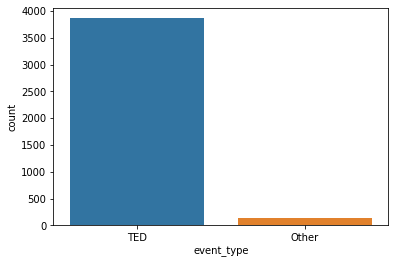

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='event_type',data=data,order=data['event_type'].value_counts().index)
# Majority of Ted Talks were hosted on TeD platform directly.
# Least number of Ted Talks were hosted on other platforms and later published on Ted platforms.

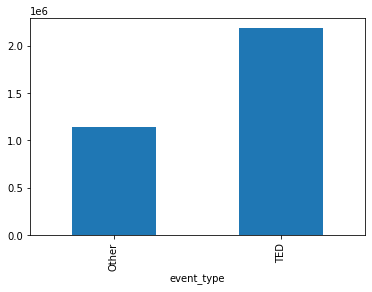

In [ ]:
data.groupby('event_type')['views'].mean().sort_values().plot(kind='bar',figsize=(6,4))
# Ted talks hosted directly on Ted platform has more average number of views than those hosted somewhere other than Ted platform.

### Duration column

In [ ]:
data['duration'].describe(percentiles=[ 0,0.50, 0.75,0.90 ,0.95,0.99,1 ])

count    4005.000000
mean       12.066854
std         6.029591
min         1.000000
0%          1.000000
50%        12.300000
75%        16.233333
90%        18.883333
95%        20.513333
99%        26.685333
100%       65.366667
max        65.366667
Name: duration, dtype: float64

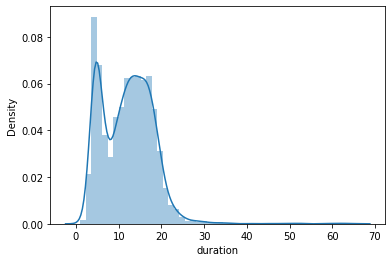

In [ ]:
sns.distplot((data['duration']))
# Density plot of duration in minutes

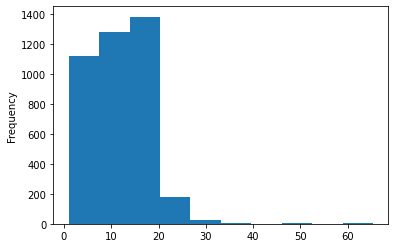

In [ ]:
data['duration'].plot(kind='hist')

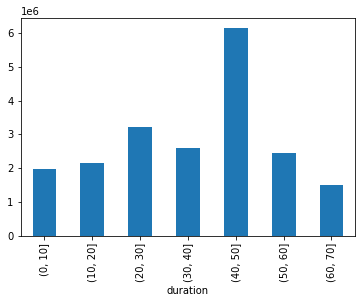

In [ ]:
bins=[0,10,20,30,40,50,60,70]
data.groupby(pd.cut(data['duration'],bins)).views.mean().plot(kind='bar')
# Average Number of views is highest for Ted talks of duration between 40-50minutes; followed by talks of duration between 20-30minutes.

### Comments column

In [ ]:
data['comments'].describe(percentiles=[ 0,0.50, 0.75,0.90 ,0.95,0.99,1 ])
# Only 1 % Ted talks have received more than 1003 comments.

count    4005.000000
mean      149.925343
std       247.403559
min         0.000000
0%          0.000000
50%        89.000000
75%       162.000000
90%       317.000000
95%       478.400000
99%      1003.920000
100%     6449.000000
max      6449.000000
Name: comments, dtype: float64

In [ ]:
len(data[data['comments']==0])
# Total 8 ted talks have 0 comments.

8

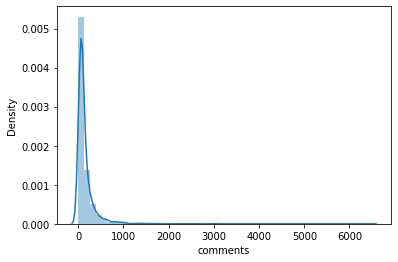

In [ ]:
sns.distplot(data['comments'])

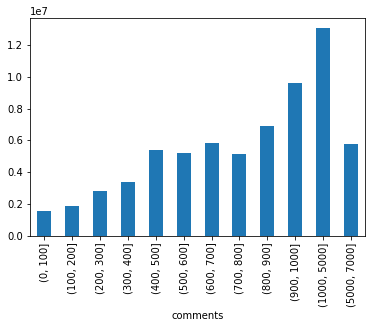

In [ ]:
bins=[0,100,200,300,400,500,600,700,800,900,1000,5000,7000]
data.groupby(pd.cut(data['comments'],bins)).views.mean().plot(kind='bar')
# As #comments on a Ted Talk increases, average of #views increases accordingly.
# Positive correlation with #views (T.V.)

### Languages column

In [ ]:
type(data.loc[0,'native_lang'])

str

In [ ]:
data['native_lang'].value_counts(normalize=True)
# Almost 99% Ted talks has eb=nglish as Native language.

en       0.988015
es       0.006742
fr       0.002247
ja       0.000749
hi       0.000499
de       0.000250
pt       0.000250
ko       0.000250
zh-cn    0.000250
ar       0.000250
pt-br    0.000250
it       0.000250
Name: native_lang, dtype: float64

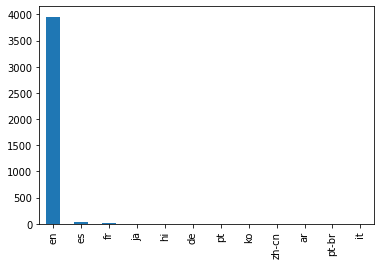

In [ ]:
data['native_lang'].value_counts().plot(kind='bar')

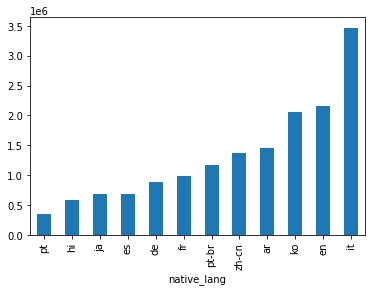

In [ ]:
data.groupby('native_lang')['views'].mean().sort_values().plot(kind='bar')
# 99% of Talks have english as their native language; however average number of views is highest for "it" language Talks.
# 'it' stands for italian.

In [ ]:
data[data['native_lang']=='it']
# There is only one Ted Talk in 'it' language published in 2017 by Pope Francis, and is now available in 32 languages and has ~35 lakh views.

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type
2383,Why the only future worth building includes ev...,His Holiness Pope Francis,3466037,2017-04-26,it,"[ar, be, bg, de, el, en, es, fa, fr, he, hr, h...",284.0,17.866667,"['children', 'climate change', 'Christianity',...","{2110: 'Let's help refugees thrive, not just s...",A single individual is enough for hope to exis...,[His Holiness Pope Francis Filmed in Vatican C...,bishop of rome,Wednesday,April,2017,1100,32,6,1.0,TED


In [ ]:
data['num_lang'].describe(percentiles=[0,0.5,0.75,0.8,0.95,0.99,1])
# Maximum languages in which a given Ted Talk is available is 73

count    4005.000000
mean       25.304120
std         9.038567
min         1.000000
0%          1.000000
50%        25.000000
75%        31.000000
80%        32.000000
95%        40.000000
99%        49.000000
100%       73.000000
max        73.000000
Name: num_lang, dtype: float64

In [ ]:
data[data['num_lang']==73]
# This Talk was given by Matt Cutts, is in english, has ~1.25crore views.

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type
929,Try something new for 30 days,Matt Cutts,12481445,2011-07-01,en,"[ar, arq, az, be, bg, bn, bs, ca, cs, da, de, ...",916.0,3.45,"['culture', 'success']","{947: 'Keep your goals to yourself', 282: 'Wha...","Is there something you've always meant to do, ...","A few years ago, I felt like I was stuck in a ...",technologist,Friday,July,2011,3226,73,6,1.0,TED


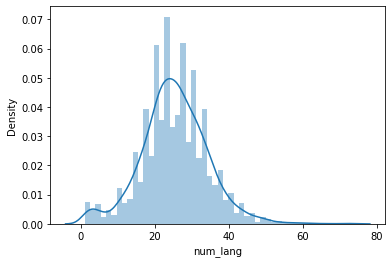

In [ ]:
sns.distplot(data['num_lang'])
# Normally distributed

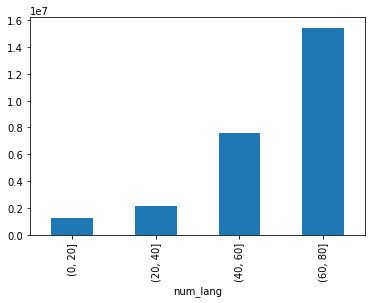

In [ ]:
bins=[0,20,40,60,80]
data.groupby(pd.cut(data['num_lang'],bins)).views.mean().plot(kind='bar')
# As #languages in which a Ted Talk is availability increases, average of #views increases accordingly.
# Positive correlation with #views (T.V.)

### Date of Publishing

i) Week-day analysis

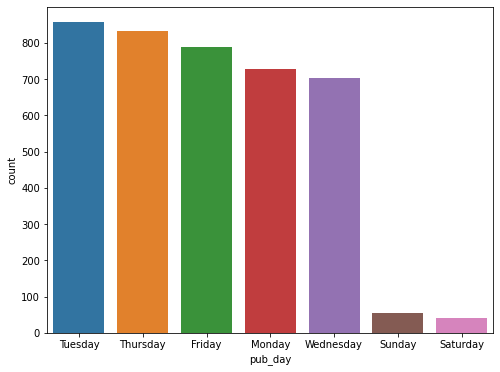

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='pub_day',data=data,order=data['pub_day'].value_counts().index)
# Majority of Ted Talks were published on Tuesday, followed by Thursday and Friday of a given week.
# Least number of Ted Talks were published on weekends.

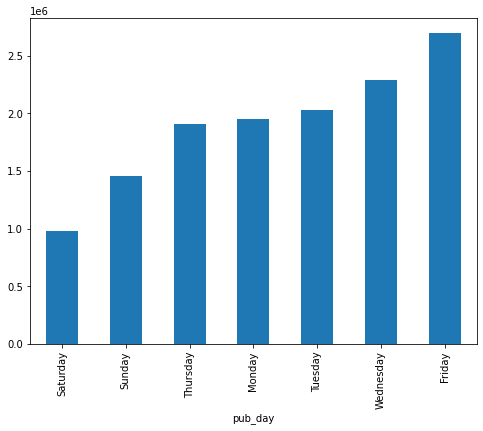

In [ ]:
data.groupby('pub_day')['views'].mean().sort_values().plot(kind='bar',figsize=(8,6))
# Ted talks published on Friday has the highest average number of views; shortly followed by Wednesday.
# While Ted talks published on weekends have the smallest average number of views.

ii) Monthly analysis

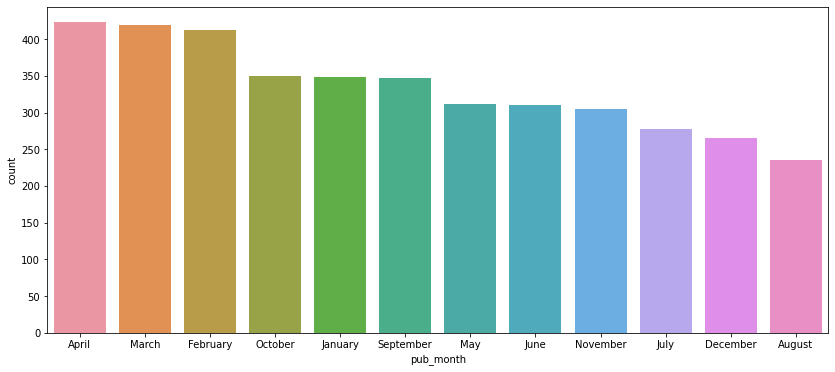

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x='pub_month',data=data,order=data['pub_month'].value_counts().index)
# Majority of Ted Talks were published during April, March & February months of a given year.

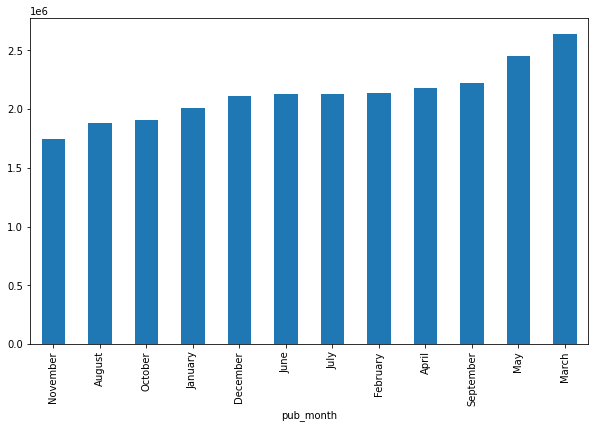

In [ ]:
data.groupby('pub_month')['views'].mean().sort_values().plot(kind='bar',figsize=(10,6))
# Ted talks published during March and May have highest average number of views.

iii) Yearly analysis

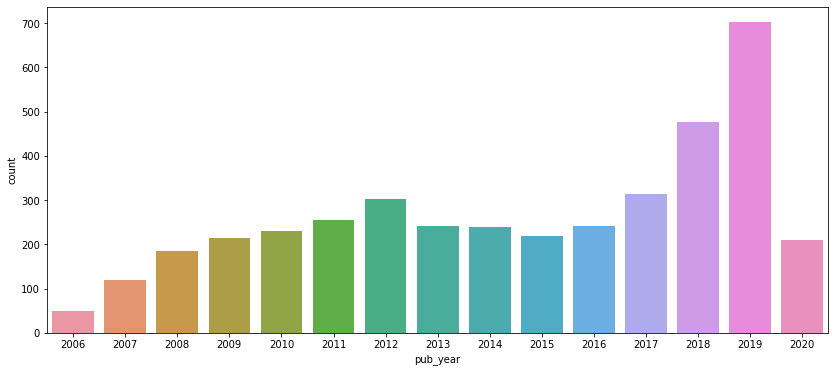

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x='pub_year',data=data)
# Majority of Ted Talks were published during year 2019, followed by 2018.
# In year 2006, least number of ted talks were published.

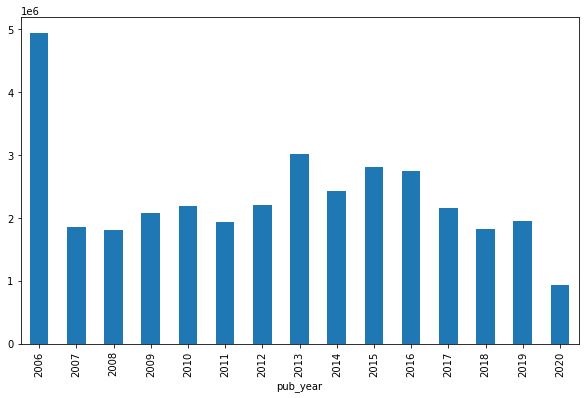

In [ ]:
data.groupby('pub_year')['views'].mean().plot(kind='bar',figsize=(10,6))
# Ted talks published during year 2006 have highest average number of views.

iv) Lifetime (Total time for which a Ted talk is online)

In [ ]:
data.lifetime[0]

5056

In [ ]:
data['lifetime'].describe(percentiles=[0,0.5,0.75,0.9,0.99,1])

count    4005.000000
mean     1923.679650
std      1446.397273
min         0.000000
0%          0.000000
50%      1675.000000
75%      3104.000000
90%      4059.600000
99%      4929.680000
100%     5056.000000
max      5056.000000
Name: lifetime, dtype: float64

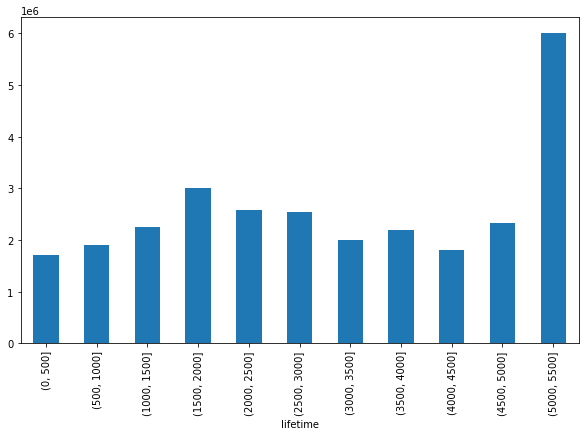

In [ ]:
bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500]
data.groupby(pd.cut(data['lifetime'],bins)).views.mean().plot(kind='bar',figsize=(10,6))
# Number of views increase as the "time period for which a Ted talk is online" increase. 

### Topics column

In [ ]:
# checking statistical parameters for topics column
data['topics'].describe()

count                   4005
unique                  3977
top       ['TED-Ed', 'math']
freq                       8
Name: topics, dtype: object

In [ ]:
# checking for any null values
data['topics'].isnull().sum()

0

In [ ]:
# checking data type for topics values
type(data.loc[0,'topics'])

str

In [ ]:
# Converting data type of topics values from string to list data type
data.loc[~data['topics'].isna(),'topics'] = data.loc[~data['topics'].isna(),'topics'].apply(lambda x:eval(x))

In [ ]:
# checking data type for topics values
type(data.loc[0,'topics'])

list

In [ ]:
# Getting total count and complete list of unique topics for overall dataset
num_topics=0
topic_dict = {}
for i,row in data.iterrows():
  lst = row['topics']
  for item in lst:
    if item in topic_dict.keys():
      topic_dict[item] += 1
    else:
      topic_dict[item] = 1
      num_topics +=1

In [ ]:
print('Total unique topics:',num_topics)
print('List of unique topics',topic_dict.keys())

Total unique topics: 457
List of unique topics dict_keys(['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'Africa', 'Asia', 'Google', 'demo', 'economics', 'health', 'statistics', 'global development', 'visualizations', 'math', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'children', 'creativity', 'dance', 'education', 'parenting', 'teaching', 'architecture', 'collaboration', 'design', 'library', 'Christianity', 'God', 'atheism', 'comedy', 'religion', 'storytelling', 'humor', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy', 'happiness', 'leadership', 'motivation', 'philanthropy', 'TED Prize', 'film', 'peace', 'social change', 'art', 'movies', 'disease', 'ebola', 'disaster relief', 'invention', 'open-source', 'entrep

In [ ]:
# Creating a new feature for count of topics against each Ted talk.
data['num_topics']=data['topics'].apply(lambda x:len(x))

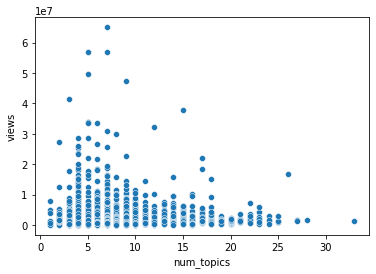

In [ ]:
# Scatter plot for number of topics versus number of views
sns.scatterplot(x='num_topics',y='views',data=data)

In [ ]:
data.head(1)

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type,num_topics
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,5056,43,6,1.0,TED,9


### Occupation of 1st speaker

In [ ]:
data['occupation1'].nunique()

1552

In [ ]:
# top 10 occupation basis frequency of occupations
occupation_10 = data['occupation1'].value_counts()[:10]
occupation_10

other             522
writer             99
author             74
journalist         68
artist             67
entrepreneur       61
designer           56
neuroscientist     47
architect          46
inventor           41
Name: occupation1, dtype: int64

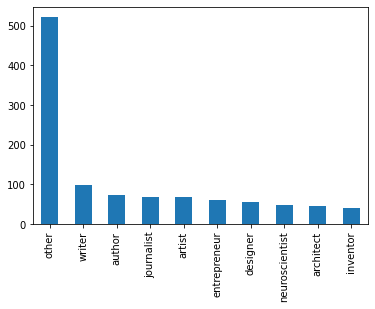

In [ ]:
occupation_10.plot(kind='bar')
# top 10 occupations with basis maximum appearances in Ted talks

### Views Column

In [ ]:
data['views'].describe(percentiles=[0,0.5,0.75,0.99,1])

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
0%       0.000000e+00
50%      1.375508e+06
75%      2.133110e+06
99%      1.629983e+07
100%     6.505195e+07
max      6.505195e+07
Name: views, dtype: float64

In [ ]:
# Details for top 10 most viewed Ted Talks.
top_10 = data.sort_values(by='views',ascending=False)[:10]
top_10.reset_index()

,index,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type,num_topics
0,4,Do schools kill creativity?,Sir Ken Robinson,65051954,2006-06-27,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,19.400000,"[children, creativity, culture, dance, educati...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,Tuesday,June,2006,5056,62,6,1.0,TED,7
1,1296,Your body language may shape who you are,Amy Cuddy,57074270,2012-10-01,en,"[ar, az, bg, ca, cs, da, de, el, en, es, et, f...",2633.0,21.033333,"[body language, brain, business, psychology, s...","{1042: 'The power of vulnerability', 26915: 'H...",(NOTE: Some of the findings presented in this ...,So I want to start by offering you a free no-t...,social psychologist,Monday,October,2012,2768,51,6,1.0,TED,7
2,2062,This is what happens when you reply to spam email,James Veitch,56932551,2016-01-08,en,"[ar, be, bg, ca, cs, da, de, el, en, es, fa, f...",257.0,9.800000,"[comedy, curiosity, communication, humor, tech...","{2236: 'Why we laugh', 26: 'If I controlled th...","Suspicious emails: unclaimed insurance bonds, ...","A few years ago, I got one of those spam email...",comedian and writer,Friday,January,2016,1574,47,6,1.0,TED,5
3,646,How great leaders inspire action,Simon Sinek,49730580,2010-05-04,en,"[ar, bg, bn, ca, cs, da, de, el, en, eo, es, e...",2079.0,18.066667,"[TEDx, business, entrepreneur, leadership, suc...","{1998: 'Why good leaders make you feel safe', ...",Simon Sinek has a simple but powerful model fo...,How do you explain when things don't go as we ...,leadership expert,Tuesday,May,2010,3649,48,6,1.0,TED,5
4,796,The power of vulnerability,Brené Brown,47544833,2010-12-23,en,"[ar, be, bg, ca, cs, da, de, el, en, es, et, e...",2209.0,20.316667,"[TEDx, communication, culture, depression, fea...","{1391: 'Listening to shame', 1053: 'Gaming to ...",Brené Brown studies human connection -- our ab...,"So, I'll start with this: a couple years ago, ...",vulnerability researcher,Thursday,December,2010,3416,52,6,1.0,TED,9
5,1724,How to speak so that people want to listen,Julian Treasure,41504331,2014-06-27,en,"[ar, bg, ca, cs, da, de, el, en, es, fa, fi, f...",405.0,9.966667,"[culture, sound, speech]","{1200: '5 ways to listen better', 1512: 'I lis...","Have you ever felt like you're talking, but no...",The human voice: It's the instrument we all pl...,sound consultant,Friday,June,2014,2134,47,6,1.0,TED,3
6,2108,Inside the mind of a master procrastinator,Tim Urban,37976820,2016-03-15,en,"[ar, bg, ca, cs, da, de, el, en, es, fa, fi, f...",559.0,14.050000,"[brain, comedy, decision-making, entertainment...","{1993: 'Comics that ask ""what if?""', 1367: 'Sa...",Tim Urban knows that procrastination doesn't m...,"So in college, I was a government major, which...",blogger,Tuesday,March,2016,1507,43,6,1.0,TED,15
7,1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546,2013-01-16,en,"[ar, be, bg, bn, ca, cs, da, de, el, en, es, f...",917.0,9.616667,"[TEDx, beauty, culture, fashion, photography]","{482: 'My 12 pairs of legs', 396: 'Fashion and...","Cameron Russell admits she won ""a genetic lott...","Hi. My name is Cameron Russell, and for the la...",model,Wednesday,January,2013,2661,44,6,1.0,TED,5
8,2724,My philosophy for a happy life,Sam Berns,33691484,2018-03-28,en,"[ar, be, cs, da, de, el, en, es, fa, fr, he, h...",89.0,12.750000,"[life, happiness, personal growth, self, motiv...",{2399: 'What makes a good life? Lessons from t...,Born with a rare genetic disorder called proge...,"Hello everyone. I'm Sam, and I just turned 17....",activist,Wednesday,March,2018,764,38,6,1.0,TED,5
9,1898,The next outbreak? We're not ready,Bill Gates,33521780,2015-04-03,en,"[ar, bg, cs, da, de, el, en, e

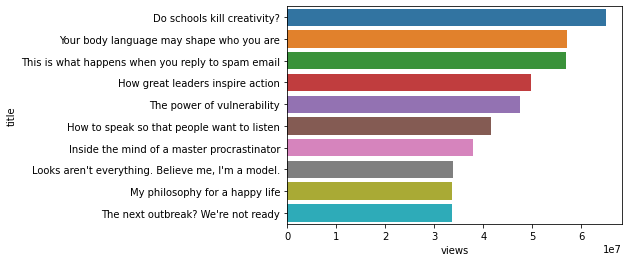

In [ ]:
# Title and #views of top 10 viewed Ted Talks.
plt1=sns.barplot(y='title',x='views',data=top_10,orient='h')

### B(v) Visualization of Numerical Features Vs Views

In [ ]:
num_features =data.describe().columns
num_features

Index(['views', 'comments', 'duration', 'lifetime', 'num_lang',
       '#related_talks', 'num_speakers', 'num_topics'],
      dtype='object')

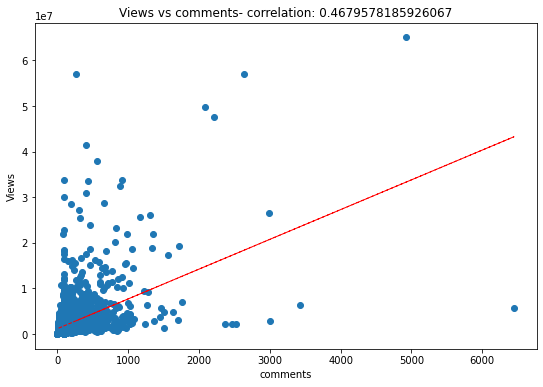

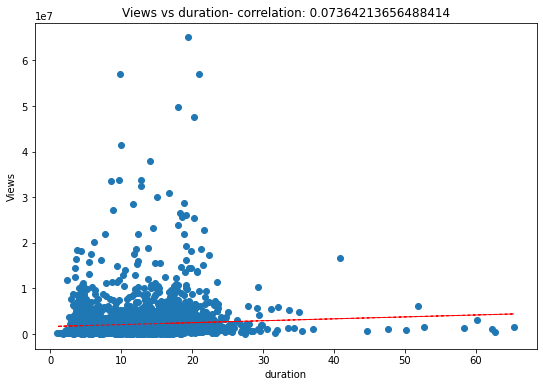

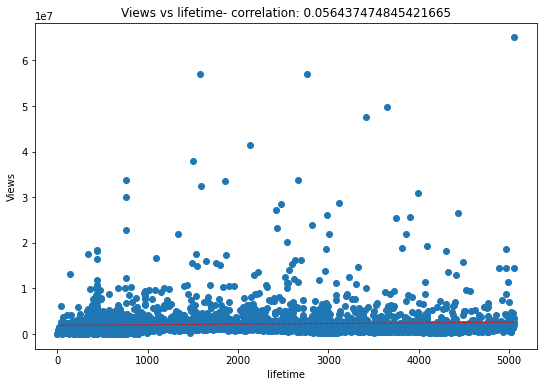

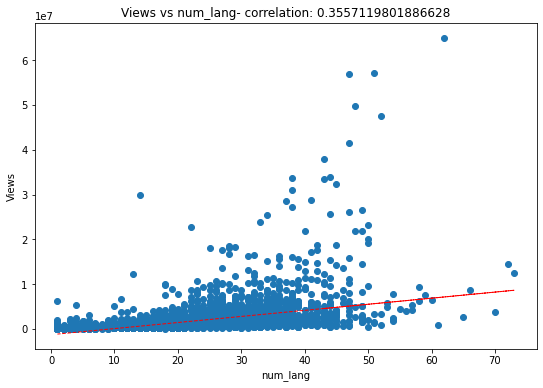

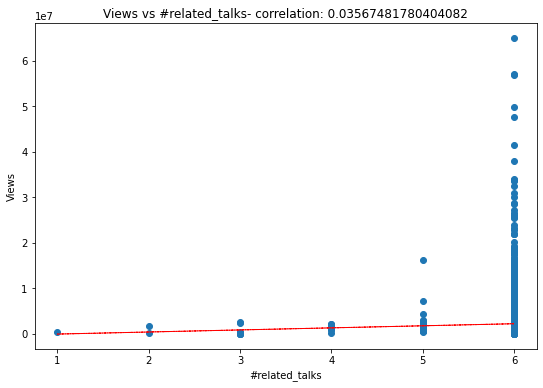

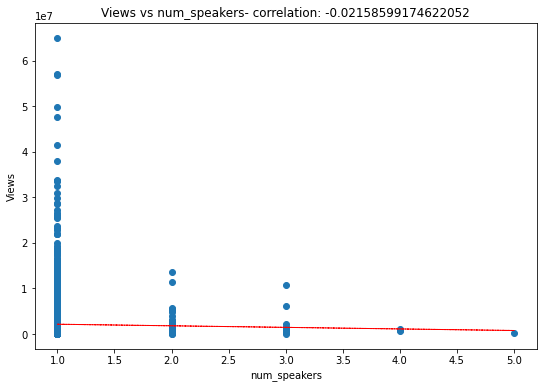

In [ ]:
for col in num_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['views']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Views')
    ax.set_title('Views vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['views'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

### B(vi). Ted Cloud of words

In [ ]:
corpus = ' '.join(data['transcript'])
corpus = corpus.replace('.', '. ')

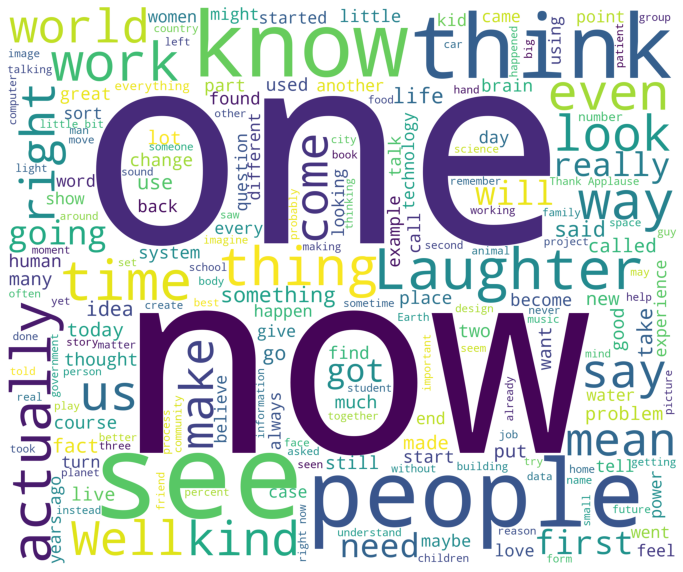

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## B(v). Bivariate Analysis

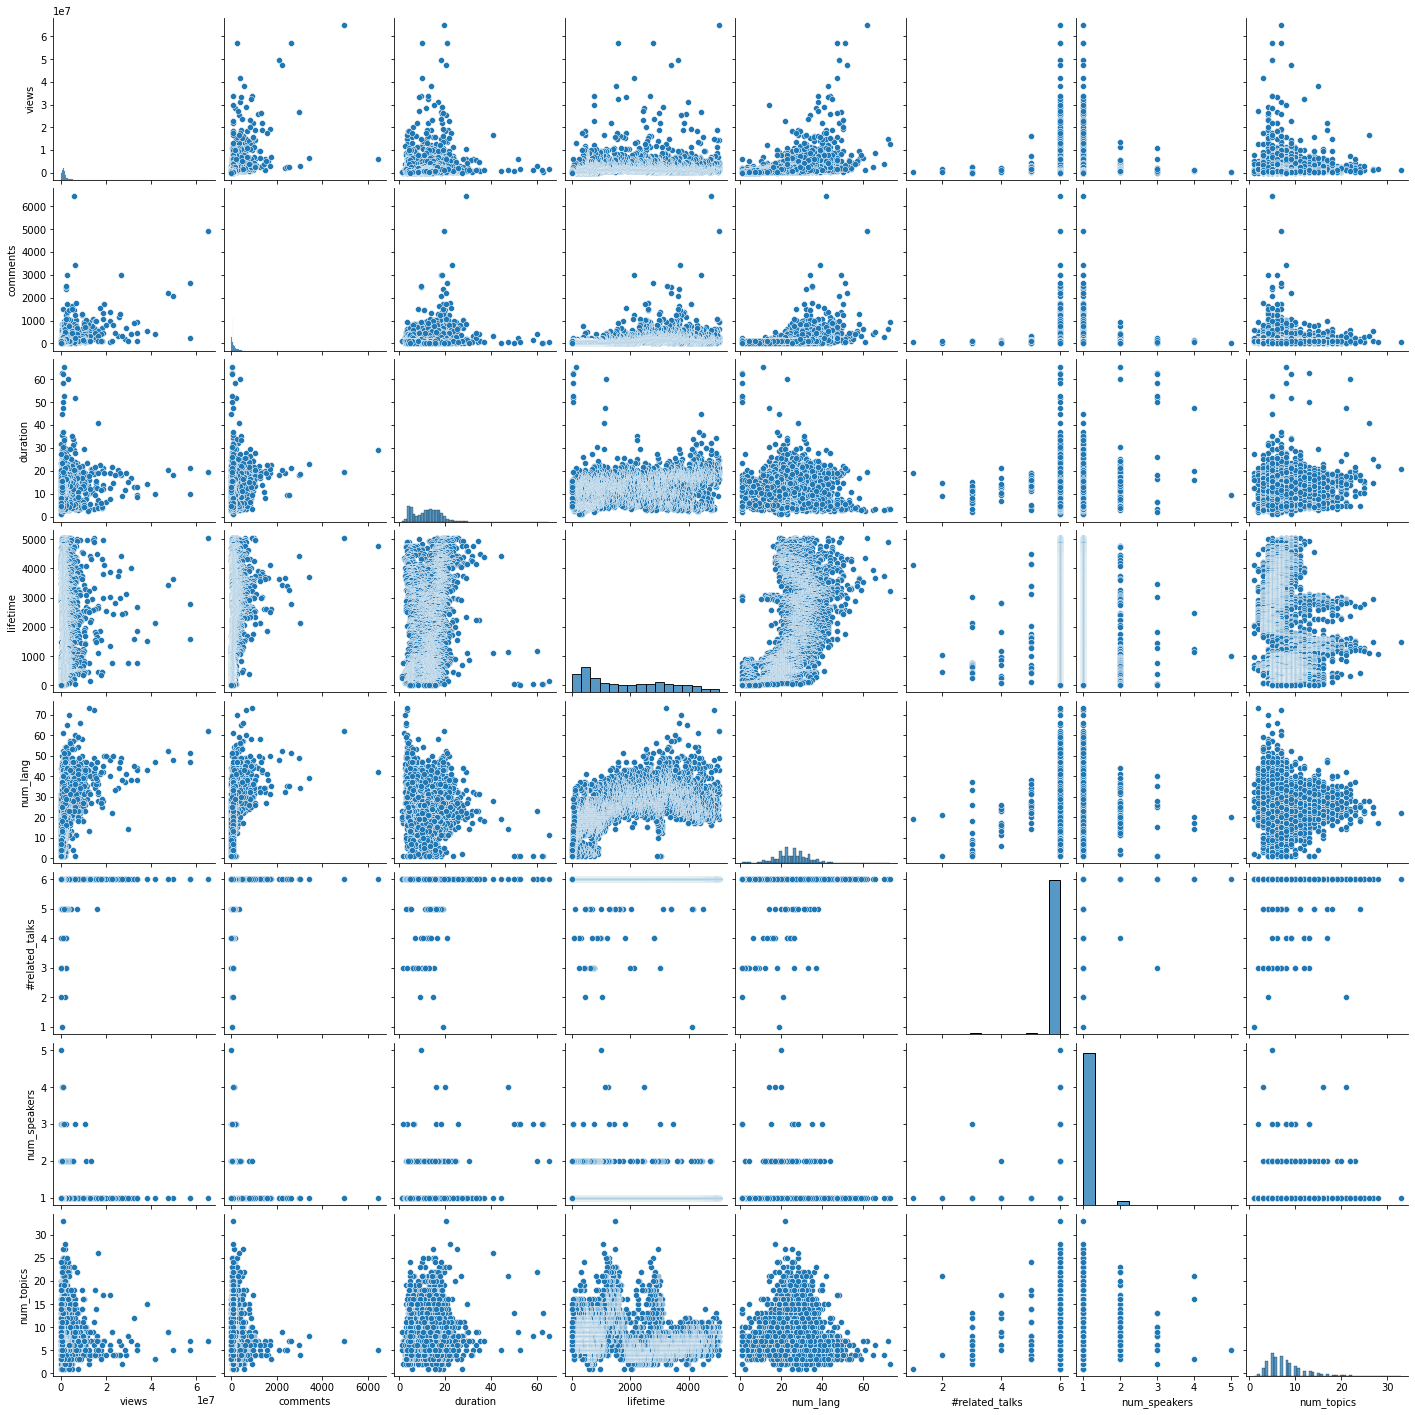

In [ ]:
sns.pairplot(data)

Views seems to have positive correlation with #related_talks, num_lang and comments. Lets check using Correlation matrix.

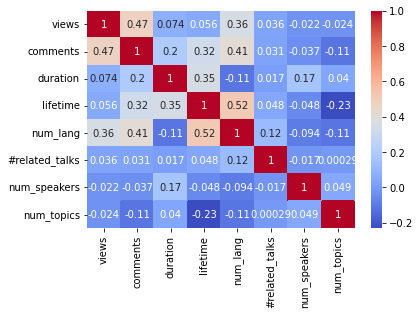

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Correlation interpretation for values between:
  1. 0 and 0.2 : very weak correlation
  2. 0.2 and 0.4 : weak correlation
  2. 0.4 and 0.6 : Moderately correlated
  3. 0.6 and 0.8 : strong correlation
  4. 0.8 and 1 : very strong correlation 

As per above correlation matrix, followings can be deduced:
1. Views is moderately correlated with number of comments and number of languages;
2. Number of languages and lifetime is moderately correlated.

## B(vi). Checking Multi-collinearity

In [ ]:
# Importing VIF from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Module function to calculate VIF
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
data.describe().columns

Index(['views', 'comments', 'duration', 'lifetime', 'num_lang',
       '#related_talks', 'num_speakers', 'num_topics'],
      dtype='object')

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['views']]])
# column '#related_talks' has VIF more than 10.

,variables,VIF
0,comments,1.788595
1,duration,7.405251
2,lifetime,5.279673
3,num_lang,16.386447
4,#related_talks,40.678795
5,num_speakers,23.742623
6,num_topics,5.520183


In [ ]:
# Lets remove #related_talks column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','#related_talks']]])

,variables,VIF
0,comments,1.753460
1,duration,6.866406
2,lifetime,5.238252
3,num_lang,11.953841
4,num_speakers,12.577948
5,num_topics,5.110054


In [ ]:
# column 'num_speakers' has VIF more than 10.
# Lets remove 'num_speakers' column and re-check VIF values
calc_vif(data[[i for i in data.describe().columns if i not in ['views','#related_talks','num_speakers']]])
# VIF values are now in acceptable range.

,variables,VIF
0,comments,1.687259
1,duration,4.901967
2,lifetime,5.041393
3,num_lang,7.761386
4,num_topics,4.623652


In [ ]:
# Now lets check Multicollinearity after applying standardization on features
from sklearn.preprocessing import StandardScaler
df_x = data[['comments','duration','lifetime','num_lang','num_topics','num_speakers','#related_talks']].copy()
scaler = StandardScaler()
scaled_df= scaler.fit_transform(df_x)

In [ ]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.rename(columns={0:'comments',1:'duration',2:'lifetime',3:'num_lang',4:'num_topics',5:'num_speakers',
                          6:'#related_talks'},inplace=True)
scaled_df

,comments,duration,lifetime,num_lang,num_topics,num_speakers,#related_talks
0,0.493485,0.699385,2.165872,1.958064,0.277902,-0.156991,0.106034
1,1.932609,1.288222,2.165872,2.621969,0.790213,-0.156991,0.106034
2,-0.104803,1.553613,2.165872,0.077000,0.277902,-0.156991,0.106034
3,0.279233,1.083649,2.165872,1.072857,0.277902,-0.156991,0.106034
4,19.327417,1.216345,2.165872,4.060429,-0.234410,-0.156991,0.106034
...,...,...,...,...,...,...,...
4000,-0.581816,-0.094024,-1.328072,-2.689271,-0.234410,-0.156991,0.106034
4001,-0.246290,-1.045009,-1.328072,-2.357318,0.021746,-0.156991,0.106034
4002,-0.569688,0.138193,-1.328763,-2.689271,-0.746721,-0.156991,0.106034
4003,-0.246290,-1.291048,-1.330146,-2.689271,1.558681,-0.156991,0.106034


In [ ]:
# Checking multi-collinearity after standardising the variables
calc_vif(scaled_df[[i for i in scaled_df.describe().columns if i not in ['views']]])
# It turns out all VIF values are in acceptable range.
# No worries for multi-collinearity.

,variables,VIF
0,comments,1.308244
1,duration,1.480298
2,lifetime,1.906745
3,num_lang,1.855023
4,num_topics,1.086950
5,num_speakers,1.044356
6,#related_talks,1.018630


## B(vii). Encoding categorical Features
> Features to be encoded: 
1. native_lang   - Label
2. event_type    - Label
3. weekday       - One-hot encoding
4. month         - One-hot encoding
5. year          - One-hot encoding

In [ ]:
data.head(1)

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,pub_day,pub_month,pub_year,lifetime,num_lang,#related_talks,num_speakers,event_type,num_topics
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,5056,43,6,1.0,TED,9


In [ ]:
# creating a new dataframe containg=ing original features plus few encoded categorical features.
df_encoded = data.copy()

In [ ]:
data['native_lang'].unique(), data['event_type'].unique()

(array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
        'it', 'hi'], dtype=object), array(['TED', 'Other'], dtype=object))

In [ ]:
#label encodings for native_lang and event_type columns.
encoders_nums = {"native_lang":{"en":1,"fr":0,"de":0,"pt":0,"ko":0,"zh-cn":0,"ar":0,"pt-br":0,"es":0,"ja":0,"it":0,"hi":0},
                 "event_type":{"TED":1,"Other":0},}

df_encoded = df_encoded.replace(encoders_nums)

In [ ]:
df_encoded['event_type'].unique(), df_encoded['native_lang'].unique()

(array([1, 0]), array([1, 0]))

In [ ]:
# One hot encodings for columns pub_day, pub_month, pub_year
df_encoded = pd.get_dummies(df_encoded, columns=['pub_day', 'pub_month', 'pub_year'], prefix=['pub_day', 'pub_month', 'pub_year'])

In [ ]:
df_encoded.head(1)

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,lifetime,num_lang,#related_talks,num_speakers,event_type,num_topics,pub_day_Friday,pub_day_Monday,pub_day_Saturday,pub_day_Sunday,pub_day_Thursday,pub_day_Tuesday,pub_day_Wednesday,pub_month_April,pub_month_August,pub_month_December,pub_month_February,pub_month_January,pub_month_July,pub_month_June,pub_month_March,pub_month_May,pub_month_November,pub_month_October,pub_month_September,pub_year_2006,pub_year_2007,pub_year_2008,pub_year_2009,pub_year_2010,pub_year_2011,pub_year_2012,pub_year_2013,pub_year_2014,pub_year_2015,pub_year_2016,pub_year_2017,pub_year_2018,pub_year_2019,pub_year_2020
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,1,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,5056,43,6,1.0,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **C. Modular Function for Model deployment**

In [ ]:
# Modular function for train-test splitting
# Original

from sklearn.model_selection import train_test_split

def split_func(X,y):
    #Cross-Validation set based on target variable of interest
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    #Scaling data using StandardScaler (Standardisation)
    scaler = StandardScaler()
    # scaler.fit(X_train)
    scaled_xtrain = scaler.fit_transform(X_train)
    scaled_xtest = scaler.transform(X_test)
    y_train= scaler.fit_transform(y_train)
    y_test= scaler.transform(y_test)
    return X_train, X_test, y_train, y_test, scaled_xtrain, scaled_xtest

In [ ]:
# # Modular function for train-test splitting
# from sklearn.model_selection import train_test_split

# def split_func(X,y,numeric):
#     #Cross-Validation set based on target variable of interest
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#     #Scaling data using StandardScaler (Standardisation)
#     scaler = StandardScaler()
#     # scaler.fit(X_train)
#     X_train[numeric] = scaler.fit_transform(X_train[numeric])
#     X_test[numeric] = scaler.transform(X_test[numeric])
#     y_train= scaler.fit_transform(y_train)
#     y_test= scaler.transform(y_test)
#     return X_train, X_test, y_train, y_test

In [ ]:
# Importing grid search and randomized search cv classes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Modular function for ML modelling
def Model_Prediction(model,parameters,metric,search):
    if search == 'random':
      reg_model = RandomizedSearchCV(estimator=model,
                       param_distributions = parameters,
                       cv = 5, scoring= metric)
    if search == 'grid':
      reg_model = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 5, scoring=metric)
    reg = reg_model.fit(scaled_xtrain, y_train)
    pred_train = reg.predict(scaled_xtrain)
    pred_test = reg.predict(scaled_xtest)
    print("Model Results")
    print("Best Train", metric, "Score: {}".format(reg.best_estimator_.score(scaled_xtrain, y_train)))
    print("Best Test", metric, "Score: {}".format(reg.best_estimator_.score(scaled_xtest, y_test)))
    print("Best Parameters: {}".format(reg.best_estimator_))
    return reg,pred_train,pred_test

In [ ]:
def plot_coef(model):
    #Plot coefficients if model uses Gradient Descent
    try:
        series_coef = pd.Series(model.coef_,index = X_train.columns)
        series_coef = series_coef.sort_values()
        series_coef.plot(kind='barh',figsize=(14,10),fontsize=14)
        plt.ylabel('Feature',fontsize=18)
        plt.xlabel('Size of Coefficient',fontsize=18)
    except AttributeError:
        pass
    #Plot feature importances if model uses Random Forest
    try:
        series_coefs = pd.Series(model.feature_importances_,index = X_train.columns)
        series_coefs = series_coefs.sort_values()
        series_coefs.plot(kind='barh',figsize=(14,10),fontsize=14)
        plt.ylabel('Feature',fontsize=18)
        plt.xlabel('Level of Importance',fontsize=18)
    except AttributeError:
        pass

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Adjusted R2
def adjusted_r2(n, k, actual, predicted):
  return (1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted))))

# Modular function to get a dataframe of all Evaluation Metrics.
def model_metric(models,pred_train,pred_test, y_train, y_test):
  
  cols = ['model_name','Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train MAPE', 'Test MAPE',
          'Train R2-Score', 'Test R2-Score', 'Train Adjusted-R2 Score', 'Test Adjusted-R2 Score']
  model_df = pd.DataFrame(columns=cols)
  
  i = 0
  for model in models:

    if model in [lr]:
      model_df.loc[i,'model_name'] = 'Linear Regression'
    if model in [reg_lasso]:
      model_df.loc[i,'model_name'] = 'Lasso Regression'
    if model in [reg_ridge]:
      model_df.loc[i,'model_name'] = 'Ridge Regression'
    if model in [reg_elsn]:
      model_df.loc[i,'model_name'] = 'ElasticNet Regression'
    if model in [rforest]:
      model_df.loc[i,'model_name'] = 'RandomForest Regression'

    model_df.loc[i,'Train RMSE'] = round(math.sqrt(mean_squared_error(y_train, pred_train)),2)
    model_df.loc[i,'Test RMSE'] = round(math.sqrt(mean_squared_error(y_test, pred_test)),2)
    model_df.loc[i,'Train MAE'] = round(mean_absolute_error(y_train, pred_train),2)
    model_df.loc[i,'Test MAE'] = round(mean_absolute_error(y_test, pred_test),2)
    model_df.loc[i,'Train MAPE'] = round(mean_absolute_percentage_error(y_train, pred_train),2)
    model_df.loc[i,'Test MAPE'] = round(mean_absolute_percentage_error(y_test, pred_test),2)
    model_df.loc[i,'Train R2-Score'] = round(r2_score(y_train, pred_train),2)
    model_df.loc[i,'Test R2-Score'] = round(r2_score(y_test, pred_test),2)
    model_df.loc[i,'Train Adjusted-R2 Score'] = round(adjusted_r2(len(y_train), len(X_train.columns), y_train, pred_train),2)
    model_df.loc[i,'Test Adjusted-R2 Score'] = round(adjusted_r2(len(y_train), len(X_train.columns), y_test, pred_test),2)

    i+=1

  return model_df

# **D. Models Deployed:**
  1. Linear Regression
  2. Lasso Linear Regression
  3. Ridge Linear Regression
  4. ElasticNet Regression
  5. RandomForest Regression
  5. XGBoost Regrssion
  6. ExtraTrees Regression

## **Dataset 1 with 43 predictors**

In [ ]:
df_encoded.head(1)

,title,speaker_1,views,published_date,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,occupation1,lifetime,num_lang,#related_talks,num_speakers,event_type,num_topics,pub_day_Friday,pub_day_Monday,pub_day_Saturday,pub_day_Sunday,pub_day_Thursday,pub_day_Tuesday,pub_day_Wednesday,pub_month_April,pub_month_August,pub_month_December,pub_month_February,pub_month_January,pub_month_July,pub_month_June,pub_month_March,pub_month_May,pub_month_November,pub_month_October,pub_month_September,pub_year_2006,pub_year_2007,pub_year_2008,pub_year_2009,pub_year_2010,pub_year_2011,pub_year_2012,pub_year_2013,pub_year_2014,pub_year_2015,pub_year_2016,pub_year_2017,pub_year_2018,pub_year_2019,pub_year_2020
0,Averting the climate crisis,Al Gore,3523392,2006-06-27,1,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,5056,43,6,1.0,1,9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Getting Predictor variables and Target Variable
X_final=df_encoded.drop(['title','speaker_1','views','published_date','available_lang','topics','related_talks','description','transcript','occupation1'],axis=1)
y_final = df_encoded[['views']]
# X_final
# y_final

In [ ]:
X_final.columns

Index(['native_lang', 'comments', 'duration', 'lifetime', 'num_lang',
       '#related_talks', 'num_speakers', 'event_type', 'num_topics',
       'pub_day_Friday', 'pub_day_Monday', 'pub_day_Saturday',
       'pub_day_Sunday', 'pub_day_Thursday', 'pub_day_Tuesday',
       'pub_day_Wednesday', 'pub_month_April', 'pub_month_August',
       'pub_month_December', 'pub_month_February', 'pub_month_January',
       'pub_month_July', 'pub_month_June', 'pub_month_March', 'pub_month_May',
       'pub_month_November', 'pub_month_October', 'pub_month_September',
       'pub_year_2006', 'pub_year_2007', 'pub_year_2008', 'pub_year_2009',
       'pub_year_2010', 'pub_year_2011', 'pub_year_2012', 'pub_year_2013',
       'pub_year_2014', 'pub_year_2015', 'pub_year_2016', 'pub_year_2017',
       'pub_year_2018', 'pub_year_2019', 'pub_year_2020'],
      dtype='object')

In [ ]:
# numeric=['comments','duration','lifetime']

In [ ]:
# Train-test splitting
X_train, X_test, y_train, y_test,scaled_xtrain,scaled_xtest = split_func(X_final,y_final)

## **1. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
lr = linear.fit(scaled_xtrain,y_train)
lr.score(scaled_xtrain,y_train)

0.3162806038791195

In [ ]:
pred_train_lr=lr.predict(scaled_xtrain)
pred_test_lr=lr.predict(scaled_xtest)

In [ ]:
models =[lr]
model_df = model_metric(models,pred_train_lr,pred_test_lr, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,Linear Regression,0.83,0.74,0.38,0.36,2.7,4.34,0.32,0.45,0.31,0.44


## **2. Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'max_iter': [1000,2000,3000]}
reg_lasso,pred_train_lasso,pred_test_lasso = Model_Prediction(lasso,parameters, metric='neg_mean_squared_error', search='grid')
reg_lasso

Model Results
Best Train neg_mean_squared_error Score: 0.31501501825464084
Best Test neg_mean_squared_error Score: 0.4477367629734147
Best Parameters: Lasso(alpha=0.001)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'max_iter': [1000, 2000, 3000]},
             scoring='neg_mean_squared_error')

Scikit-learn considers by convention that a score follow the rule: 'higher values are better than lower values'. In this case a small MSE shows that your predictions are close to data so it follows the opposite rule. That's why sklearn consider the negative (actually opposite) MSE as score. Thus **a big neg_mean_squared_error is better than a low one.** 

In [ ]:
y_train.shape,pred_train_lasso.shape

((3204, 1), (3204,))

MAPE doesn't make sense when y_true can be zero, because division by zero is not defined. You'll have to use a different measurement.

Excluding values where y_true is zero is not good practice; sometimes your data is zero, and you need to model that. In other words, the choice of MAPE is the problem, not the data.

MAE will behave similarly, except that it is expressed in terms of the original units, instead of as a percentage. 

**check reasons: MAPE not to be used??**

In [ ]:
models =[reg_lasso]
model_df = model_metric(models,pred_train_lasso,pred_test_lasso, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,Lasso Regression,0.83,0.75,0.37,0.36,2.66,4.47,0.32,0.45,0.31,0.44


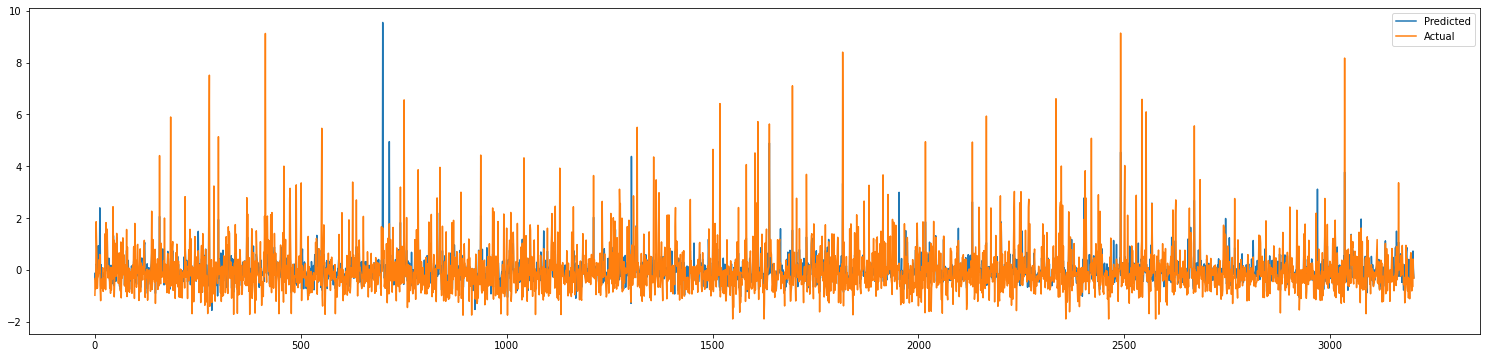

In [ ]:
plt.figure(figsize=(26,6))
plt.plot(pred_train_lasso)
plt.plot(y_train)
plt.legend(["Predicted","Actual"])
plt.show()

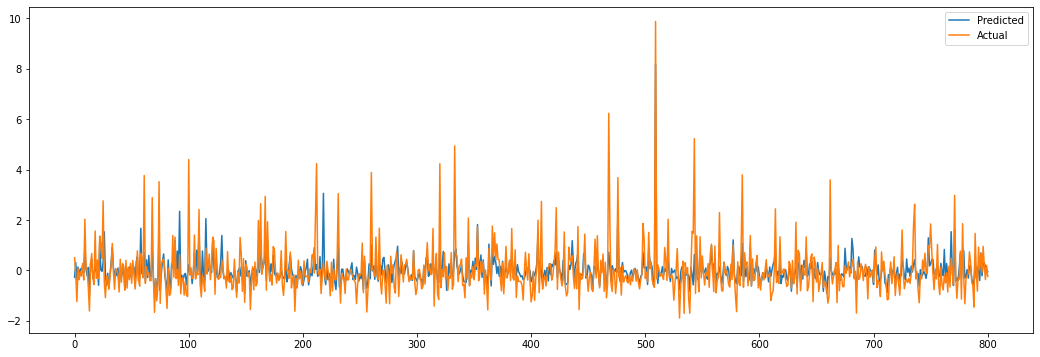

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(pred_test_lasso)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
reg_lasso.best_estimator_.coef_

array([-0.00000000e+00,  3.45873777e-01,  1.45986839e-01, -2.35470839e-01,
        4.02784577e-01, -0.00000000e+00, -1.21750641e-03,  0.00000000e+00,
       -2.29858037e-02,  4.78553463e-02, -1.98541781e-02,  0.00000000e+00,
        6.44083289e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.28267999e-02,  1.74152026e-03,  8.95634742e-03,
        0.00000000e+00, -1.68392777e-02, -1.15529049e-02,  2.34391238e-02,
       -0.00000000e+00, -1.16726950e-02, -2.26027890e-03,  0.00000000e+00,
        1.70658638e-02,  8.35310095e-05,  0.00000000e+00, -0.00000000e+00,
       -6.76654395e-02, -9.02353346e-02, -3.81494854e-02, -3.06932566e-02,
       -1.93709831e-02, -1.00034914e-02, -0.00000000e+00,  1.11755832e-02,
        4.23656248e-02,  3.33230935e-02,  0.00000000e+00])

Text(0.5, 1.0, 'Impact of Features on Views Prediction: Lasso Regression')

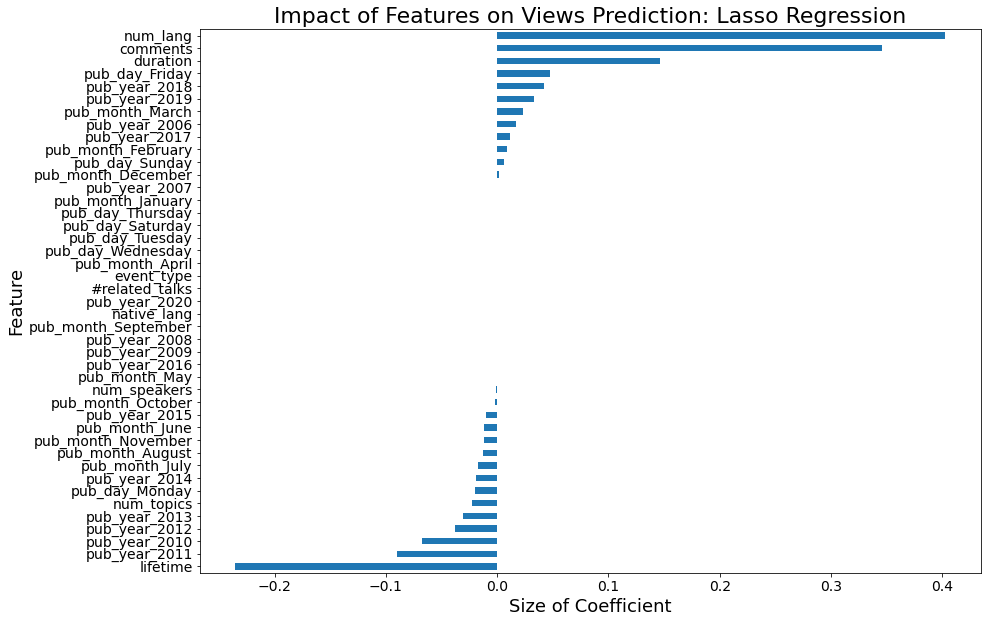

In [ ]:
plot_coef(reg_lasso.best_estimator_)
plt.title('Impact of Features on Views Prediction: Lasso Regression',fontsize=22)

## **3. Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
reg_ridge,pred_train_rdg,pred_test_rdg = Model_Prediction(ridge,parameters, metric='neg_mean_squared_error', search='grid')
reg_ridge

Model Results
Best Train neg_mean_squared_error Score: 0.3149235455133905
Best Test neg_mean_squared_error Score: 0.44827807137780473
Best Parameters: Ridge(alpha=100)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
models =[reg_ridge]
model_df = model_metric(models,pred_train_rdg,pred_test_rdg, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,Ridge Regression,0.83,0.75,0.37,0.35,2.58,4.14,0.31,0.45,0.31,0.44


## **4. ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elsn = ElasticNet()
parameters = {'alpha': [1e-3,1e-2,0.014,0.14,1,5,10,20,50,60,100],'l1_ratio':[0.3,0.35,0.38,0.4,0.6,0.8,0.9],'max_iter':[3000,5000,7000]}
reg_elsn,pred_train_elsn,pred_test_elsn = Model_Prediction(elsn,parameters, metric='neg_mean_squared_error', search='grid')
reg_elsn

Model Results
Best Train neg_mean_squared_error Score: 0.3137503097053169
Best Test neg_mean_squared_error Score: 0.44613011502167055
Best Parameters: ElasticNet(alpha=0.014, l1_ratio=0.35, max_iter=3000)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.014, 0.14, 1, 5, 10, 20, 50,
                                   60, 100],
                         'l1_ratio': [0.3, 0.35, 0.38, 0.4, 0.6, 0.8, 0.9],
                         'max_iter': [3000, 5000, 7000]},
             scoring='neg_mean_squared_error')

In [ ]:
reg_elsn.best_estimator_

ElasticNet(alpha=0.014, l1_ratio=0.3, max_iter=5000)

In [ ]:
models =[reg_elsn]
model_df = model_metric(models,pred_train_elsn,pred_test_elsn, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,ElasticNet Regression,0.83,0.75,0.37,0.35,2.58,4.22,0.31,0.45,0.3,0.44


## **5. RandomForest Regression**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              "bootstrap": [True, False]}

In [ ]:
# checking list of valid scorings
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()
rforest,pred_train_rf,pred_test_rf = Model_Prediction(rforest,param_dict, metric='r2', search='grid')
rforest

Model Results
Best Train r2 Score: 0.36327232309515467
Best Test r2 Score: 0.254122923730428
Best Parameters: RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80)


{'bootstrap': [True, False],
 'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
models =[rforest]
model_df = model_metric(models,pred_train_rf,pred_test_rf, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,RandomForest Regression,0.8,0.87,0.32,0.33,2.1,3.81,0.36,0.25,0.35,0.24


## **6. XGBoost Regrssion**

In [ ]:
param_grid = {
    'n_estimators': [50,100, 400, 800],
    'max_depth': [3, 6, 9,15],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
xgb,pred_train_xgb,pred_test_xgb = Model_Prediction(xgb,param_dict, metric='r2', search='grid')
xgb

[13:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [ ]:
xgb.best_estimator_

XGBRegressor(bootstrap=True, max_depth=4, min_samples_leaf=40,
             min_samples_split=50, n_estimators=80)

In [ ]:
models =[xgb]
model_df = model_metric(models,pred_train_xgb,pred_test_xgb, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,NaN,0.45,0.76,0.23,0.3,1.58,3.87,0.8,0.42,0.8,0.41


## **7. ExtraTrees Regression**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
x_tree = ExtraTreesRegressor()

In [ ]:
param_grid = {
    'n_estimators': [50,100, 400, 800],
    'min_samples_split' : [50,100,150],
    'max_features' : ['sqrt', 'log2', None]
    }

In [ ]:
x_tree,pred_train_xtr,pred_test_xtr = Model_Prediction(x_tree,param_dict, metric='r2', search='grid')
x_tree

Model Results
Best Train r2 Score: 0.31312781654497845
Best Test r2 Score: 0.25287556828824687
Best Parameters: ExtraTreesRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=100)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [385]:
x_tree.best_estimator_

ExtraTreesRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=100)

In [387]:
models =[x_tree]
model_df = model_metric(models,pred_train_xtr,pred_test_xtr, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,NaN,0.83,0.87,0.34,0.35,1.91,4.58,0.31,0.25,0.3,0.24


## **8. CatBoost Regression**

In [399]:
from google.colab import output
output.enable_custom_widget_manager()

In [393]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 58 kB/s 


In [401]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   views           4005 non-null   int64  
 3   published_date  4005 non-null   object 
 4   native_lang     4005 non-null   object 
 5   available_lang  4005 non-null   object 
 6   comments        4005 non-null   float64
 7   duration        4005 non-null   float64
 8   topics          4005 non-null   object 
 9   related_talks   4005 non-null   object 
 10  description     4005 non-null   object 
 11  transcript      4005 non-null   object 
 12  occupation1     4005 non-null   object 
 13  pub_day         4005 non-null   object 
 14  pub_month       4005 non-null   object 
 15  pub_year        4005 non-null   object 
 16  lifetime        4005 non-null   int64  
 17  num_lang        4005 non-null   i

In [445]:
X = data.drop(['title','speaker_1','views','published_date','available_lang','topics','related_talks','description','transcript','occupation1','views'],axis=1)

In [446]:
X.columns

Index(['native_lang', 'comments', 'duration', 'pub_day', 'pub_month',
       'pub_year', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'event_type', 'num_topics'],
      dtype='object')

In [447]:
numeric=['comments','duration','lifetime','#related_talks','num_topics']

In [448]:
scaler = StandardScaler()
X[numeric] = scaler.fit_transform(X[numeric])

In [450]:
y_c =data[['views']]

In [449]:
#List of categorical columns
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['native_lang', 'pub_day', 'pub_month', 'pub_year', 'event_type']
Location of categorical columns :  [0, 3, 4, 5, 10]


In [451]:
# Train-test splitting
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y_c,train_size=0.8,random_state= 42)
#get shape of train and test data
print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (3204, 12)
test data size: (801, 12)


In [452]:
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [453]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.061135
0:	learn: 3482694.2713055	test: 2985233.0384916	best: 2985233.0384916 (0)	total: 7.07ms	remaining: 7.06s
1:	learn: 3408936.9063045	test: 2947138.1586327	best: 2947138.1586327 (1)	total: 13.3ms	remaining: 6.65s
2:	learn: 3352147.7563930	test: 2898007.0554481	best: 2898007.0554481 (2)	total: 20.5ms	remaining: 6.82s
3:	learn: 3298903.4406208	test: 2858976.0022619	best: 2858976.0022619 (3)	total: 26.4ms	remaining: 6.57s
4:	learn: 3249370.3691698	test: 2844626.7562624	best: 2844626.7562624 (4)	total: 32.6ms	remaining: 6.48s
5:	learn: 3208562.2259433	test: 2817619.4122470	best: 2817619.4122470 (5)	total: 38.3ms	remaining: 6.34s
6:	learn: 3155236.5861902	test: 2787608.4758652	best: 2787608.4758652 (6)	total: 44.4ms	remaining: 6.29s
7:	learn: 3112899.4077102	test: 2765821.0671749	best: 2765821.0671749 (7)	total: 49.9ms	remaining: 6.19s
8:	learn: 3062478.1445019	test: 2735097.7845793	best: 2735097.7845793 (8)	total: 56.1ms	remaining: 6.18s
9:	learn: 3035864.3177092

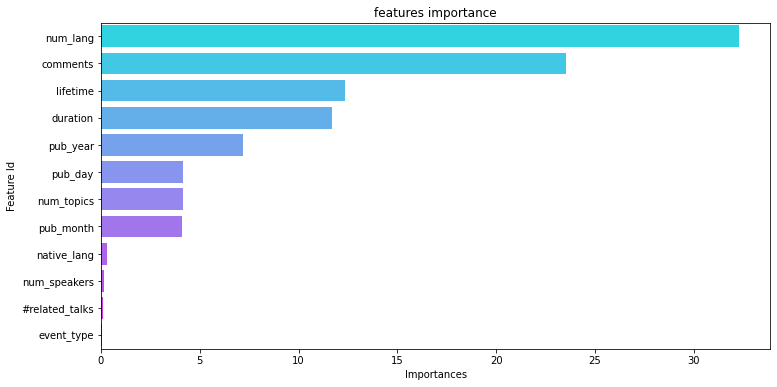

In [454]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [457]:
y_predict= cat_model.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = r2_score(y_test,y_predict)
# MAE
mae_score = mean_absolute_error(y_test,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))
print("MAE score:{:.2f}".format(mae_score))

Evaluation on test data
RMSE: 2283585.96
R2: 0.43
Adjusted R2: 0.43
MAE score:1030535.30


In [463]:
# Calculating Normalized RMSE
diff = data['views'].max() - data['views'].min()
norm_RMSE = Rmse_test / diff
norm_RMSE

0.035104033257346734

## **B) Dataset 2**

In [ ]:
 data.columns

Index(['title', 'speaker_1', 'views', 'published_date', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript', 'occupation1', 'pub_day', 'pub_month',
       'pub_year', 'lifetime', 'num_lang', '#related_talks', 'num_speakers',
       'event_type', 'num_topics'],
      dtype='object')

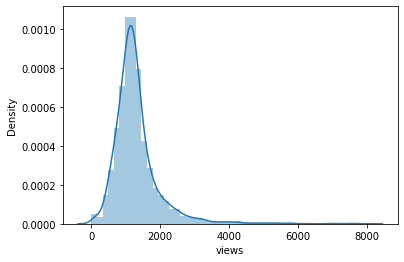

In [ ]:
sns.distplot(np.sqrt(data['views']))

In [ ]:
X2 = data.drop(['title','speaker_1','views','published_date','native_lang','available_lang','topics','related_talks','description','transcript','occupation1','pub_day','pub_month','pub_year','event_type'],axis=1)

In [ ]:
y2 = np.sqrt(data[['views']])

In [ ]:
# Train-test splitting
X_train, X_test, y_train, y_test, scaled_xtrain, scaled_xtest = split_func(X2,y2)

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'max_iter': [1000,2000,3000]}
reg_lasso,pred_train,pred_test = Model_Prediction(lasso,parameters, metric='neg_mean_squared_error', search='grid')
reg_lasso

Model Results
Best Train neg_mean_squared_error Score: 0.3982285554195176
Best Test neg_mean_squared_error Score: 0.4261674500689875
Best Parameters: Lasso(alpha=0.001)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'max_iter': [1000, 2000, 3000]},
             scoring='neg_mean_squared_error')

In [ ]:
models =[reg_lasso]
model_df = model_metric(models,pred_train,pred_test, y_train, y_test)
model_df

,model_name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2-Score,Test R2-Score,Train Adjusted-R2 Score,Test Adjusted-R2 Score
0,Lasso Regression,0.78,0.75,0.51,0.51,3.83,2.45,0.4,0.43,0.4,0.42


# Future Project Ideas: 
> 1. Text corpus (NLP): 
    1. title    
    2. description   
    3. Topics 
    3. Transcript 

